Aleksandra Bednarczuk

# Survey on Municipal Services of Barcelona's City

Source of the data: 

https://opendata-ajuntament.barcelona.cat/data/en/dataset/esm-bcn-evo

https://opendata-ajuntament.barcelona.cat/doc/BackOff_DescCompDefCamps/EnquestaServeisMunicipals_BCN/2019_Any/2019_r19006_ESM_Questionari_v1_0.pdf

In [1]:
import pandas as pd
import numpy as np

import geopandas as gpd
import contextily as cx

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# 1.1. Reading the data

In [2]:
survey = pd.read_csv('../data/survey/2019_r19006_esm_evolucio_bdd_v1_0/2019_r19006_esm_evolucio_bdd_v1_0.csv', low_memory=False)

In [3]:
survey.head()

,Unnamed: 0,ID,ANY,NOM_DISTRICTE,NOM_BARRI,DATA_ENQ,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,RES_HAB,PADRO,...,DEM_BARRI_N1,CONSULTA_DIARI_Q01_N1,CONSULTA_DIARI_Q02_N1,VEURE_TELE_Q01_N1,VEURE_TELE_Q02_N1,VEURE_TELE_Q03_N1,HAB_COTXE_PART_1A4,US30D_XARXES_Q06,US30D_XARXES_Q07,PMI_1A3_2017
0,1,198900001,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TV3,NaN,NaN,CAP,NaN,NaN,NaN
1,2,198900002,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ALTRES,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
2,3,198900003,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
3,4,198900004,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,EL PERIÓDICO,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
4,5,198900005,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TV3,NaN,NaN,CAP,NaN,NaN,NaN


In [4]:
survey.shape

(135813, 286)

In [5]:
survey.columns.tolist()

['Unnamed: 0',
 'ID',
 'ANY',
 'NOM_DISTRICTE',
 'NOM_BARRI',
 'DATA_ENQ',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'RES_HAB',
 'PADRO',
 'EVO1A_BCN',
 'EVO1A_CAT',
 'EVO1A_ESP',
 'FUTUR_BCN',
 'FUTUR_CAT',
 'FUTUR_ESP',
 'SATISF_RES_BCN_0A10',
 'PROB_BCN',
 'PROB_CAT',
 'PROB_ESP',
 'PROB_PERS',
 'VAL_GESTMUNI',
 'VAL_GESTGENE',
 'VAL_GESTGOESP',
 'DEM_BCN_MUNI',
 'VAL_ESCOMBRARIES',
 'VAL_NETEJA',
 'VAL_SOROLL',
 'VAL_VERD',
 'VAL_ENLLUM',
 'VAL_URBA',
 'VAL_ASFALT',
 'VAL_FACANES',
 'VAL_CIRCUL',
 'VAL_APARCA',
 'VAL_BUS',
 'VAL_METRO',
 'VAL_TRAM',
 'VAL_BICING',
 'VAL_GUB',
 'VAL_SPEIS',
 'VAL_SEGUR',
 'VAL_SEGUR_BARRI',
 'VAL_ESPORT',
 'VAL_SIAC',
 'VAL_CSS',
 'VAL_CULT',
 'VAL_FESTESPOP',
 'VAL_MERCAT',
 'VAL_BIBLIO',
 'VAL_CC',
 'EVO1A_ESCOMBRARIES',
 'EVO1A_NETEJA',
 'EVO1A_SOROLL',
 'EVO1A_VERD',
 'EVO1A_ENLLUM',
 'EVO1A_URBA',
 'EVO1A_ASFALT',
 'EVO1A_FACANES',
 'EVO1A_CIRCUL',
 'EVO1A_APARCA',
 'EVO1A_BUS',
 'EVO1A_METRO',
 'EVO1A_TRAM',
 'EVO1A_BICING',
 'EVO1A_GUB',
 'E

In [6]:
for i in survey.columns.tolist():
    print(i, survey[i].unique(), "\n")

Unnamed: 0 [     1      2      3 ... 135811 135812 135813] 

ID [198900001 198900002 198900003 ... 201907061 201907062 201907063] 

ANY [1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019] 

NOM_DISTRICTE ['CIUTAT VELLA' 'SANT MARTÍ' 'EIXAMPLE' 'SANTS - MONTJUÏC' 'LES CORTS'
 'SARRIÀ - SANT GERVASI' 'GRÀCIA' 'HORTA - GUINARDÓ' 'NOU BARRIS'
 'SANT ANDREU'] 

NOM_BARRI [nan 'EL RAVAL' 'EL BARRI GÒTIC' 'LA BARCELONETA'
 'SANT PERE, SANTA CATERINA I LA RIBERA' 'EL FORT PIENC'
 'LA SAGRADA FAMÍLIA' "LA DRETA DE L'EIXAMPLE"
 "L'ANTIGA ESQUERRA DE L'EIXAMPLE" "LA NOVA ESQUERRA DE L'EIXAMPLE"
 'SANT ANTONI' 'EL POBLE SEC' 'LA MARINA DEL PRAT VERMELL'
 'LA MARINA DE PORT' 'LA FONT DE LA GUATLLA' 'HOSTAFRANCS' 'LA BORDETA'
 'SANTS-BADAL' 'SANTS' 'LES CORTS' 'LA MATERNITAT I SANT RAMON'
 'PEDRALBES' 'VALLVIDRERA, EL TIBIDABO I LES PLANES' 'SARRIÀ'
 'LES TRES TORRES' 'SANT GERVASI-LA BONANOVA'

VAL_SOROLL [nan '4' '5' '6' '1' '2' '7' '0 = PÈSSIMA GESTIÓ' '3' '8'
 '10 = EXCEL·LENT GESTIÓ' '9' 'NO HO SAP' 'NO CONTESTA'] 

VAL_VERD [nan '5' '3' '9' '0 = PÈSSIMA GESTIÓ' '7' '6' '8' '10 = EXCEL·LENT GESTIÓ'
 '2' '4' '1' 'NO HO SAP' 'NO CONTESTA'] 

VAL_ENLLUM ['6' '10 = EXCEL·LENT GESTIÓ' '5' '7' '8' '4' '0 = PÈSSIMA GESTIÓ' '1' '2'
 '9' 'NO HO SAP' '3' 'NO CONTESTA' nan] 

VAL_URBA ['4' '6' '5' '7' '0 = PÈSSIMA GESTIÓ' '2' '3' '1' '8' 'NO HO SAP'
 '10 = EXCEL·LENT GESTIÓ' '9' 'NO CONTESTA' nan] 

VAL_ASFALT ['6' '10 = EXCEL·LENT GESTIÓ' '7' '8' '4' '0 = PÈSSIMA GESTIÓ' '3' '1' '5'
 '2' '9' 'NO HO SAP' 'NO CONTESTA' nan] 

VAL_FACANES [nan '5' '3' '6' '7' '4' '10 = EXCEL·LENT GESTIÓ' '0 = PÈSSIMA GESTIÓ' '2'
 '8' '9' 'NO HO SAP' '1' 'NO CONTESTA'] 

VAL_CIRCUL ['0 = PÈSSIMA GESTIÓ' '3' '1' '4' '5' '6' '2' '7' '8' 'NO HO SAP'
 '10 = EXCEL·LENT GESTIÓ' '9' 'NO CONTESTA' nan] 

VAL_APARCA ['0 = PÈSSIMA GESTIÓ' '3' '1' '5' '4' '2' '9' '7' '8' 'NO HO SAP' '6'
 '10 = EXCEL·LENT GESTIÓ' 

CANVI_LLOC_RES_1A3 [nan 'ES QUEDARIA A VIURE EN EL MATEIX BARRI'
 'ANIRIA A VIURE A UN ALTRE BARRI DE BARCELONA'
 'ANIRIA A VIURE FORA DE BARCELONA' 'NO CONTESTA' 'NO HO SAP' 'ALTRES'] 

VAL_GESTBARRI [nan '3' '7' '5' '4' '6' '9' '8' '2' '1' '0 = MOLT DOLENTA'
 '10 = MOLT BONA' 'NO HO SAP' 'NO CONTESTA'] 

DEM_BARRI [nan 'ERADICAR LA DROGA' 'MILLORAR LA NETEJA (NO CONCRETEN)'
 "PROMOURE LA REHABILITACIÓ D'HABITATGES / FAÇANES / ASCENSORS"
 "MILLORAR L'URBANISME" 'REDUIR ELS SOROLLS (NO CONCRETEN)'
 'ARREGLAR EL RELLEU DELS CARRER / POSAR ESCALES MECÀNIQUES' 'ALTRES'
 'MILLORAR LA SEGURETAT (NO CONCRETEN)'
 'AUGMENTAR/MILLORAR EL TRANSPORT PÚBLIC'
 'AUGMENTAR / MILLORAR LES ZONES VERDES'
 'AUGMENTAR/MILLORAR ALTRES SERVEIS'
 'AUGMENTAR/MILLORAR SERVEIS (NO CONCRETEN)' 'NO CONTESTA' 'CAP / RES'
 "AUGMENTAR L'APARCAMENT" 'CREAR LLOCS DE TREBALL'
 "MILLORAR L'ACCÉS A L'HABITATGE"
 "MILLORAR LA RECOLLIDA D'ESCOMBRARIES I CONTENIDORS"
 'AUGMENTAR/MILLORAR ALTRES EQUIPAMENTS' 'AMPLIAR LA XARX

PMS_VACANCES [nan 'NO' 'NO HO SAP' 'SÍ' 'NO CONTESTA'] 

PMS_ALIM [nan 'SÍ' 'NO' 'NO CONTESTA' 'NO HO SAP'] 

PMS_IMPREVIST650 [nan 'NO' 'SÍ' 'NO CONTESTA' 'NO HO SAP'] 

PMS_ENERGIA [nan 'SÍ' 'NO' 'NO HO SAP' 'NO CONTESTA'] 

HAB_REGIM_1A5 [nan 'EN LLOGUER' 'EN CESSIÓ GRATUÏTA' 'EN PROPIETAT' 'NO CONTESTA'
 'OCUPADA' "PAGA PER L'ÚS D'UNA HABITACIÓ I D'ALTRES ESPAIS COMPARTITS"
 'NO HO SAP' 'ALTRA SITUACIÓ'] 

HAB_HIP [nan 'NO' 'SÍ' 'NO CONTESTA' 'NO HO SAP'] 

COST_HIP_NRE [    nan  700.    300.    600.    500.    790.    400.    670.    900.
  750.    350.    360.    150.   1000.    327.    430.    285.    550.
   60.    160.    450.    312.    110.    267.    140.    850.   1100.
  220.    620.    355.    403.    520.    530.    250.    340.    800.
 1200.    260.    380.    190.    370.   1375.    650.   1250.   1500.
  630.    482.    680.    690.    200.    890.    286.   1400.    302.
  490.    915.    440.    770.    320.    311.    480.    460.    363.
  420.    280.    950.  

IDEO_1A8 ['NO HO SAP / NO LI INTERESSA' 'CENTRE' 'ESQUERRA' 'CENTRE ESQUERRA'
 'DRETA' 'CENTRE DRETA' 'EXTREMA ESQUERRA' 'EXTREMA DRETA' 'APOLÍTIC'
 'NO CONTESTA'] 

SENTPERTI [nan 'TAN ESPANYOL COM CATALÀ' 'MÉS CATALÀ QUE ESPANYOL'
 'ÚNICAMENT CATALÀ' 'ÚNICAMENT ESPANYOL' 'NO HO SAP'
 'MÉS ESPANYOL QUE CATALÀ' 'NO CONTESTA' 'ALTRES'] 

MUNI_VOTAR [nan 'NO VA PODER VOTAR (NACIONALITAT, EDAT, PROBLEMES AMB EL CENS)'
 'VA VOTAR' 'NO VA VOTAR' 'NO ESTAVA CENSAT/ADA A LA CIUTAT' 'NO CONTESTA'
 'NO RECORDA SI VA VOTAR'] 

MUNI_PARTIT ['NO CONTESTA' 'NO VA VOTAR' 'PSC - PSOE (JAUME COLLBONI)'
 'PP (ALBERTO FERNÁNDEZ DÍAZ)' 'ICV - EUIA (RICARD GOMÀ)'
 'CIU (XAVIER TRIAS)' 'ERC (ALFRED BOSCH)' 'NO HO SAP / NO HO RECORDA'
 'ALTRES' 'EN BLANC' nan 'NUL'
 'CUP - CAPGIREM BARCELONA (MARÍA JOSÉ LECHA)' 'PACMA'
 'CIUTADANS / CIUDADANOS (CARINA MEJÍAS)' 'REAGRUPAMENT' 'SOLIDARITAT'
 'SI' 'PIRATA.CAT' 'BARCELONA EN COMÚ (GUANYEM BARCELONA) (ADA COLAU)'] 

RELIGIO [nan 'CATÒLIC PRACTICANT' 'NO CREIENT 

VAL_TRAM_1A2 [nan 'NS / NC' 'APROVAT (5 A 10)' 'SUSPÈS (0 A 4)'] 

VAL_BICING_1A2 [nan 'NS / NC' 'SUSPÈS (0 A 4)' 'APROVAT (5 A 10)'] 

VAL_GUB_1A2 [nan 'APROVAT (5 A 10)' 'SUSPÈS (0 A 4)' 'NS / NC'] 

VAL_SPEIS_1A2 [nan 'NS / NC' 'APROVAT (5 A 10)' 'SUSPÈS (0 A 4)'] 

VAL_SEGUR_1A2 [nan 'APROVAT (5 A 10)' 'SUSPÈS (0 A 4)' 'NS / NC'] 

VAL_SEGUR_BARRI_1A2 [nan 'APROVAT (5 A 10)' 'SUSPÈS (0 A 4)' 'NS / NC'] 

VAL_ESPORT_1A2 [nan 'APROVAT (5 A 10)' 'NS / NC' 'SUSPÈS (0 A 4)'] 

VAL_SIAC_1A2 [nan 'APROVAT (5 A 10)' 'NS / NC' 'SUSPÈS (0 A 4)'] 

VAL_CSS_1A2 [nan 'APROVAT (5 A 10)' 'NS / NC' 'SUSPÈS (0 A 4)'] 

VAL_CULT_1A2 [nan 'APROVAT (5 A 10)' 'NS / NC' 'SUSPÈS (0 A 4)'] 

VAL_FESTESPOP_1A2 [nan 'APROVAT (5 A 10)' 'NS / NC' 'SUSPÈS (0 A 4)'] 

VAL_MERCAT_1A2 [nan 'APROVAT (5 A 10)' 'SUSPÈS (0 A 4)' 'NS / NC'] 

VAL_BIBLIO_1A2 [nan 'APROVAT (5 A 10)' 'NS / NC' 'SUSPÈS (0 A 4)'] 

VAL_CC_1A2 [nan 'NS / NC' 'APROVAT (5 A 10)' 'SUSPÈS (0 A 4)'] 

VAL_TRANSP_1A3 [nan 'MOLT/BASTANT DOTADA' 'N

CONSULTA_DIARI_Q02_N1 [nan 'EL PERIÓDICO' 'DIARI PAPER GRATUÏT (20 MINUTOS)' 'LA VANGUARDIA'
 'DIARIS ESPORTIUS' 'EL PAÍS' 'EL MUNDO' 'EL PUNT AVUI' 'PÚBLICO' 'ABC'
 'ALTRES' 'DIARIS INTERNACIONALS' 'DIARIS ECONÒMICS'
 'DIARIS COMARCALS/LOCALS' 'LA RAZÓN' 'ARA' 'DIARIS DIGITALS PURS'
 'VILAWEB' "ALTRES D'INFORMACIÓ GENERAL DIGITALS PURS" 'CONFIDENCIAL'
 'ELNACIONAL.CAT' 'NACIÓ DIGITAL' 'ELDIARIO.ES' 'DIRECTE.CAT'
 "ALTRES D'INFORMACIÓ GENERAL AMB VERSIÓ IMPRESA" 'E-NOTÍCIES'] 

VEURE_TELE_Q01_N1 ['TV3' 'LA 1' 'LA 2' nan 'NO MIRA LA TELEVISIÓ' 'ANTENA 3' 'TELE 5'
 'CANAL 33' 'MOVISTAR #0' 'NO HO SAP' 'NO TÉ TELEVISIÓ' 'ALTRES'
 'BETEVÉ (BTV)' 'NO CONTESTA' '8TV' 'CUATRO' 'CANALS INFORMATIUS'
 'LASEXTA' 'CANALS ESPORTIUS' 'CANALS MUSICALS' 'CANALS INTERNACIONALS'
 "CANALS D'ENTRETENIMENT / SÈRIES / CINEMA" 'CANALS DOCUMENTALS'
 'CANALS INFANTILS/ JUVENILS' 'CANALS AUTONÒMICS' 'INTERECONOMÍA'
 'ALTRES CANALS LOCALS' '13 TV'] 

VEURE_TELE_Q02_N1 [nan 'TELE 5' 'TV3' 'LA 1' 'ANTENA 3' 'LASEX

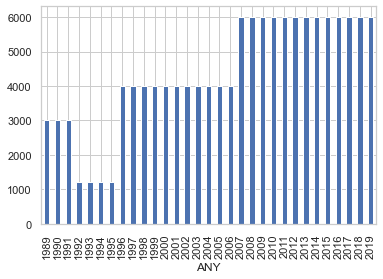

In [7]:
survey.groupby(['ANY']).size().plot.bar()

In [8]:
survey = survey.query('ANY >= 2007')

In [9]:
survey.shape

(78013, 286)

In [10]:
# Columns with NA values are being removed
# Reason: most of the columns are categorical and it is not easy nor efficient to replace those NAs with meaningful values 
survey.dropna(axis='columns', inplace=True)

In [11]:
survey.shape

(78013, 174)

# 1.2. Translating the data from Catalan to English and subsetting the DataFrame to only relevant columns (survey questions)

As the survey is conducted in Catalan, the data is also saved in this language. In this section the data is being translated into English. The translation was done by the author.

In [12]:
# Reading questions dataset with a flag indicating if the question is relevant for further analysis
questions = pd.read_excel('../data/survey/survey_filtered/2019_r19006_ESM_Evolucio_BDD_Metainformacio_Preguntes_v1_0.xlsx')

In [13]:
questions.head()

,Nom_variable,Flag,Pregunta,Question,Tipus_variable
0,ID,0,IDENTIFICADOR DE L'ENQUESTA,SURVEY IDENTIFIER,numeric
1,ANY,1,ANY DE L'ENQUESTA,SURVEY YEAR,numeric
2,NOM_DISTRICTE,1,DISTRICTE MUNICIPAL,DISTRICT,factor
3,NOM_BARRI,1,BARRI,BARRI,factor
4,GRANBARRI,1,GRAN BARRI,GRAN BARRI,factor


In [14]:
questions.shape

(285, 5)

In [15]:
# Filtering out unnecessary questions
questions = questions.query('Flag == 1')
questions.head()

,Nom_variable,Flag,Pregunta,Question,Tipus_variable
1,ANY,1,ANY DE L'ENQUESTA,SURVEY YEAR,numeric
2,NOM_DISTRICTE,1,DISTRICTE MUNICIPAL,DISTRICT,factor
3,NOM_BARRI,1,BARRI,BARRI,factor
4,GRANBARRI,1,GRAN BARRI,GRAN BARRI,factor
6,SEXE,1,SEXE,SEX,factor


In [16]:
questions.shape

(67, 5)

In [17]:
# Dictionary with Catalan and Spanish names/descriptions of questions
df = questions[['Nom_variable', 'Question']]
questions_dict = {}
for i in range(len(df)):
    questions_dict[df.iloc[i].Nom_variable] = df.iloc[i].Question
questions_dict

{'ANY': 'SURVEY YEAR',
 'NOM_DISTRICTE': 'DISTRICT',
 'NOM_BARRI': 'BARRI',
 'GRANBARRI': 'GRAN BARRI',
 'SEXE': 'SEX',
 'EDAT1899_1A6': 'AGE',
 'NACIO_ACT_UE': 'WHAT IS YOUR NATIONALITY?',
 'TMP_RES_BCN_1A6': 'HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?',
 'TMP_RES_BARRI_1A6': 'HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?',
 'EVO1A_BCN': 'DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?',
 'FUTUR_BCN': 'FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?',
 'SATISF_RES_BCN_1A4': 'ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA? - GROUPED',
 'VAL_GESTMUNI_1A2': 'ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL? - GROUPED',
 'VAL_ESCOMBRARIES_1A2': 'CITY SERVICES - RATE: GARBAGE COLLECTION - GROUPED',
 'VAL_NETEJA_1A2': 'CITY SERVICES - RATE: STREETS CLEANING - GROUPED',
 'VAL_

In [18]:
relevant_questions = list(questions.Nom_variable.unique())

In [19]:
# # Filtering the table by choosing only those questions which are relevant for further analysis
# survey = survey[relevant_questions]

In [20]:
# Some of the columns chosen a relevant for further analysis are not available due to NA values
for i in ['COST_ESPAI_1A14', 'VAL_BICING_1A2', 'HAB_CERT_DISC', 'HAB_TREBDOM', 'VAL_SPEIS_1A2', 'HAB_REGIM_1A5', 'PROB_LLAR_ECON_1A6', 'MUNI_VOTAR', 'US_ASSOCIA_BARRI', 'VAL_TRAM_1A2', 'VAL_SOROLL_1A2', 'COST_LLOGUER_1A14', 'VAL_CC_1A2', 'TE_CERT_DISCAP']:
    relevant_questions.remove(i)

In [21]:
survey = survey[relevant_questions]

In [22]:
survey.head()

,ANY,NOM_DISTRICTE,NOM_BARRI,GRANBARRI,SEXE,EDAT1899_1A6,NACIO_ACT_UE,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,EVO1A_BCN,...,HAB_COTXE_PART,HAB_M2_1A14,LLAR_INGRESSOS_1A10,CLASSESOC_ENT,SENTPERTI,LLOC_NAIX_1A4,LLENGUA_HAB,ESTUDIS_1A6,RESUM_PARENTIU,HAB_RES_1A4
57800,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,HOME,DE 25 A 34 ANYS,ESPANYOLA,MÉS DE 5 ANYS I FINS A 10 ANYS,MÉS DE 5 ANYS I FINS A 10 ANYS,HA MILLORAT,...,NO,FINS 50 M2,DE 1.501 A 2.000 EUROS,CLASSE MITJANA-MITJANA,MÉS ESPANYOL QUE CATALÀ,ESTRANGER,CASTELLÀ,SECUNDARIS PROFESSIONALS,PARELLA AMB FILLS,QUATRE O MÉS
57801,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,HOME,DE 65 ANYS I MÉS,ESPANYOLA,SEMPRE HA VISCUT A LA CIUTAT,SEMPRE HA VISCUT AL BARRI,HA MILLORAT,...,NO,DE 71 A 80 M2,DE 1.001 A 1.500 EUROS,CLASSE MITJANA-BAIXA,TAN ESPANYOL COM CATALÀ,BARCELONA CIUTAT,CATALÀ,OBLIGATORIS,PARELLA SOLA,DUES
57802,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,HOME,DE 25 A 34 ANYS,ESPANYOLA,SEMPRE HA VISCUT A LA CIUTAT,SEMPRE HA VISCUT AL BARRI,ESTÀ IGUAL,...,SÍ,NO HO SAP,DE 1.001 A 1.500 EUROS,CLASSE MITJANA-MITJANA,TAN ESPANYOL COM CATALÀ,BARCELONA CIUTAT,CASTELLÀ,UNIVERSITARIS,PARELLA AMB FILLS,QUATRE O MÉS
57803,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,DONA,DE 45 A 54 ANYS,ESPANYOLA,SEMPRE HA VISCUT A LA CIUTAT,MÉS DE 2 ANYS I FINS A 5 ANYS,HA MILLORAT,...,SÍ,DE 61 A 70 M2,NO CONTESTA,CLASSE MITJANA-BAIXA,TAN ESPANYOL COM CATALÀ,BARCELONA CIUTAT,CASTELLÀ,SECUNDARIS PROFESSIONALS,PERSONA SOLA,UNA
57804,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,HOME,DE 35 A 44 ANYS,ALTRES UNIÓ EUROPEA,MÉS DE 10 ANYS,MÉS DE 10 ANYS,HA MILLORAT,...,SÍ,DE 51 A 60 M2,DE 1.001 A 1.500 EUROS,CLASSE MITJANA-MITJANA,TAN ESPANYOL COM CATALÀ,ESTRANGER,CASTELLÀ,SECUNDARIS GENERALS,PARELLA SOLA,DUES


In [23]:
# Reading answers dataset with a flag indicating if the answer relates to the question
# which was tagged as relevant for further analysis or not
answers = pd.read_excel('../data/survey/survey_filtered/2019_r19006_ESM_Evolucio_BDD_Metainformacio_Respostes_v1_0.xlsx')

In [24]:
answers.head()

,Nom_variable,Flag,Resposta,Answer
0,NOM_DISTRICTE,1,CIUTAT VELLA,CIUTAT VELLA
1,NOM_DISTRICTE,1,EIXAMPLE,EIXAMPLE
2,NOM_DISTRICTE,1,SANTS - MONTJUÏC,SANTS - MONTJUÏC
3,NOM_DISTRICTE,1,LES CORTS,LES CORTS
4,NOM_DISTRICTE,1,SARRIÀ - SANT GERVASI,SARRIÀ - SANT GERVASI


In [25]:
answers.shape

(4529, 4)

In [26]:
answers = answers.query('Flag == 1')
answers.head()

,Nom_variable,Flag,Resposta,Answer
0,NOM_DISTRICTE,1,CIUTAT VELLA,CIUTAT VELLA
1,NOM_DISTRICTE,1,EIXAMPLE,EIXAMPLE
2,NOM_DISTRICTE,1,SANTS - MONTJUÏC,SANTS - MONTJUÏC
3,NOM_DISTRICTE,1,LES CORTS,LES CORTS
4,NOM_DISTRICTE,1,SARRIÀ - SANT GERVASI,SARRIÀ - SANT GERVASI


In [27]:
answers.shape

(451, 4)

As the survey was conducted in Catalan or Spanish and the answers are recorded in Catalan it needs to be translated into English for better understanding of the responses. The survey was initially translated on metadata tables with questions (Preguntas) and answers (Respostes). Below, I create a dictionary translating_answers with question name (Nom_variable) as a key and temp_dict as a value. Temp_dict is a nested dictionary, with Catalan answer as a key and English translation of this answer as a value.


In [28]:
translating_answers = {}
for i in answers.Nom_variable.unique():
    temp_dict = {}
    temp_dict[str(np.nan)] = np.nan
    df = answers.query('Nom_variable == @i')
    for j in range(len(df)):
        temp_dict[str(df.iloc[j].Resposta)] = df.iloc[j].Answer
    translating_answers[i] = temp_dict

In [29]:
survey['VAL_BUS_1A2'].unique()

array(['APROVAT (5 A 10)', 'SUSPÈS (0 A 4)', 'NS / NC'], dtype=object)

In [30]:
translating_answers['VAL_BUS_1A2']

{'nan': nan,
 'SUSPÈS (0 A 4)': 'BAD (0 TO 4)',
 'APROVAT (5 A 10)': 'GOOD (5 TO 10)',
 'NS / NC': "I DON'T KNOW / NO ANSWER"}

In [31]:
# Using a for loop, the survey is being translated by replacing Catalan version of an answer
# with its English translation using translating_answers dictionary created above.
for column in [i for i in list(survey.columns) if i not in ["ANY", "COST_LLOGUER_NRE", "COST_ESPAI_NRE"]]:
    translate = translating_answers[column]
    for i in survey[column].unique():
        survey[column].replace(i, translate[str(i)], inplace=True)

In [32]:
survey['VAL_BUS_1A2'].unique()

array(['GOOD (5 TO 10)', 'BAD (0 TO 4)', "I DON'T KNOW / NO ANSWER"],
      dtype=object)

# 1.3. Subsetting the data to responses of people aged 65+ 
For further analysis we will use the data from 2008-2019 Surveys with responses of people aged 65 years and more. Data from 2008-2018 will be used for training the models and data from 2019 - for testing.

In [33]:
survey.groupby(['EDAT1899_1A6']).size()

EDAT1899_1A6
65 YEARS AND OVER      19582
FROM 18 TO 24 YEARS     5856
FROM 25 TO 34 YEARS    14092
FROM 35 TO 44 YEARS    15191
FROM 45 TO 54 YEARS    12730
FROM 55 TO 64 YEARS    10562
dtype: int64

In [34]:
survey_65 = survey.query('EDAT1899_1A6 == "65 YEARS AND OVER" and ANY >= 2011')

In [35]:
survey_65.shape

(13742, 53)

In [36]:
# Creating a copy of the data subset for further data preparation and features generation
data = survey_65.copy()

In [37]:
survey_65.shape, data.shape

((13742, 53), (13742, 53))

# 1.4. Exploratory Data Analysis and data preparation

## 1.4.1 Dependent variable

Survey question: IF YOU HAD THE POSSIBILITY AND THE RESOURCES TO CHANGE YOUR RESIDENCE, WHERE WOULD YOU LIVE?

In [38]:
survey_65.groupby(['CANVI_LLOC_RES_1A3']).size()

CANVI_LLOC_RES_1A3
I DON'T KNOW                                           124
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA     1321
I WOULD LIVE OUTSIDE BARCELONA                        1798
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD         10498
NO ANSWER                                                1
dtype: int64

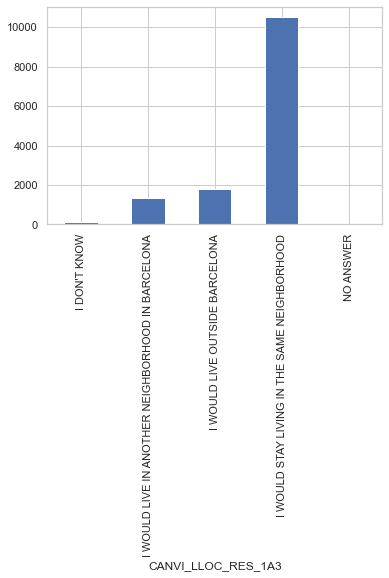

In [39]:
survey_65.groupby(['CANVI_LLOC_RES_1A3']).size().plot.bar()

In [40]:
data_prep = {'I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD': 0,
            'I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA': 1,
             'I WOULD LIVE OUTSIDE BARCELONA': np.nan,
             "I DON'T KNOW": np.nan,
             'NO ANSWER': np.nan
            }
data['Would_not_stay_in_the_neighborhood'] = [data_prep[i] for i in data['CANVI_LLOC_RES_1A3']]

In [41]:
count_stay = len(data[data['Would_not_stay_in_the_neighborhood']==0])
count_move = len(data[data['Would_not_stay_in_the_neighborhood']==1])
pct_of_stay = count_stay/(count_stay + count_move)
print("Number of elderly who would stay in their neighborhood:", count_stay)
print("Percentage of elderly who would stay in their neighborhood:", round(pct_of_stay*100,2), '%')
pct_of_move = count_move/(count_stay + count_move)
print("Number of elderly who would hange their neighborhood or move out from the city:", count_move)
print("Percentage of elderly who would change their neighborhood or move out from the city:", round(pct_of_move*100,2), '%')

Number of elderly who would stay in their neighborhood: 10498
Percentage of elderly who would stay in their neighborhood: 88.82 %
Number of elderly who would hange their neighborhood or move out from the city: 1321
Percentage of elderly who would change their neighborhood or move out from the city: 11.18 %


## 1.4.2 Independent variables

First insight into the dataset using cross tablation of dependent variable and different features:

In [42]:
for i in data.columns.tolist():
    display(pd.crosstab(data[i], data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
ANY,,
2011,1131,145
2012,1149,146
2013,1204,154
2014,1195,130
2015,1225,144
2016,1245,142
2017,1225,117
2018,1059,179
2019,1065,164


Would_not_stay_in_the_neighborhood,0.0,1.0
NOM_DISTRICTE,,
CIUTAT VELLA,679,142
EIXAMPLE,1769,152
GRÀCIA,868,82
HORTA - GUINARDÓ,1200,165
LES CORTS,969,43
NOU BARRIS,1051,201
SANT ANDREU,867,143
SANT MARTÍ,1239,155
SANTS - MONTJUÏC,898,191


Would_not_stay_in_the_neighborhood,0.0,1.0
NOM_BARRI,,
BARÓ DE VIVER,17,7
CAN BARÓ,57,15
CAN PEGUERA,15,2
CANYELLES,78,7
CIUTAT MERIDIANA,50,31
...,...,...
VALLBONA,7,5
VALLCARCA I ELS PENITENTS,133,14
"VALLVIDRERA, EL TIBIDABO I LES PLANES",24,2


Would_not_stay_in_the_neighborhood,0.0,1.0
GRANBARRI,,
"CANYELLES, LES ROQUETES I LA TRINITAT NOVA",239,56
EL BARRI GÒTIC,163,23
"EL BESÒS, EL MARESME I PROVENÇALS",209,34
EL CAMP D'EN GRASSOT I GRÀCIA NOVA,314,24
EL CARMEL I CAN BARÓ,249,59
EL CLOT I EL CAMP DE L'ARPA,258,33
EL FORT PIENC,270,27
EL GUINARDÓ,288,37
"EL PARC, LA LLACUNA I LA VILA OLÍMPICA",212,24


Would_not_stay_in_the_neighborhood,0.0,1.0
SEXE,,
MAN,4099,492
WOMAN,6399,829


Would_not_stay_in_the_neighborhood,0.0,1.0
EDAT1899_1A6,,
65 YEARS AND OVER,10498,1321


Would_not_stay_in_the_neighborhood,0.0,1.0
NACIO_ACT_UE,,
OTHER EU,88,6
REMAINING COUNTRIES,88,17
SPANISH,10322,1298


Would_not_stay_in_the_neighborhood,0.0,1.0
TMP_RES_BCN_1A6,,
FROM 6 MONTHS TO 2 YEARS,37,11
I HAVE ALWAYS LIVED IN THE CITY,4402,610
MORE THAN 10 YEARS,5931,683
MORE THAN 2 YEARS AND UP TO 5 YEARS,60,9
MORE THAN 5 YEARS AND UP TO 10 YEARS,68,8


Would_not_stay_in_the_neighborhood,0.0,1.0
TMP_RES_BARRI_1A6,,
FROM 6 MONTHS TO 2 YEARS,118,31
I HAVE ALWAYS LIVED IN THE BARRI,1449,110
LESS THAN SIX MONTHS,33,9
MORE THAN 10 YEARS,8525,1060
MORE THAN 2 YEARS AND UP TO 5 YEARS,143,49
MORE THAN 5 YEARS AND UP TO 10 YEARS,230,62


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_BCN,,
I DON'T KNOW,288,27
IT HAS IMPROVED,3355,322
IT'S THE SAME,2858,310
IT'S WORSE,3992,661
NO ANSWER,5,1


Would_not_stay_in_the_neighborhood,0.0,1.0
FUTUR_BCN,,
I DON'T KNOW,1609,193
IT WILL IMPROVE,5385,587
IT WILL STAY THE SAME,1024,150
IT WILL WORSE,2471,389
NO ANSWER,9,2


Would_not_stay_in_the_neighborhood,0.0,1.0
SATISF_RES_BCN_1A4,,
FAIRLY SATISFIED (5 to 6),883,183
I DON'T KNOW / NO ANSWER,42,8
LITTLE / NOT SATISFIED (0 TO 4),190,54
SATISFIED (7 TO 8),4328,582
VERY SATISFIED (9 TO 10),5055,494


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_GESTMUNI_1A2,,
BAD (0 TO 4),1584,276
GOOD (5 TO 10),8413,992
I DON'T KNOW / NO ANSWER,501,53


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ESCOMBRARIES_1A2,,
BAD (0 TO 4),504,102
GOOD (5 TO 10),9954,1212
I DON'T KNOW / NO ANSWER,40,7


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_NETEJA_1A2,,
BAD (0 TO 4),1568,300
GOOD (5 TO 10),8903,1019
I DON'T KNOW / NO ANSWER,27,2


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_VERD_1A2,,
BAD (0 TO 4),1591,305
GOOD (5 TO 10),8396,965
I DON'T KNOW / NO ANSWER,511,51


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ENLLUM_1A2,,
BAD (0 TO 4),882,159
GOOD (5 TO 10),9430,1136
I DON'T KNOW / NO ANSWER,186,26


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_URBA_1A2,,
BAD (0 TO 4),1064,213
GOOD (5 TO 10),8176,951
I DON'T KNOW / NO ANSWER,1258,157


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ASFALT_1A2,,
BAD (0 TO 4),2122,356
GOOD (5 TO 10),8246,949
I DON'T KNOW / NO ANSWER,130,16


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_FACANES_1A2,,
BAD (0 TO 4),1076,208
GOOD (5 TO 10),8748,1040
I DON'T KNOW / NO ANSWER,674,73


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CIRCUL_1A2,,
BAD (0 TO 4),3066,451
GOOD (5 TO 10),6873,803
I DON'T KNOW / NO ANSWER,559,67


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_APARCA_1A2,,
BAD (0 TO 4),5709,779
GOOD (5 TO 10),3150,343
I DON'T KNOW / NO ANSWER,1639,199


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_BUS_1A2,,
BAD (0 TO 4),893,180
GOOD (5 TO 10),9023,1092
I DON'T KNOW / NO ANSWER,582,49


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_METRO_1A2,,
BAD (0 TO 4),266,51
GOOD (5 TO 10),8891,1147
I DON'T KNOW / NO ANSWER,1341,123


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_GUB_1A2,,
BAD (0 TO 4),1722,284
GOOD (5 TO 10),7494,887
I DON'T KNOW / NO ANSWER,1282,150


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SEGUR_1A2,,
BAD (0 TO 4),3167,500
GOOD (5 TO 10),6799,749
I DON'T KNOW / NO ANSWER,532,72


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SEGUR_BARRI_1A2,,
BAD (0 TO 4),2505,520
GOOD (5 TO 10),7862,780
I DON'T KNOW / NO ANSWER,131,21


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ESPORT_1A2,,
BAD (0 TO 4),834,182
GOOD (5 TO 10),5379,688
I DON'T KNOW / NO ANSWER,4285,451


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SIAC_1A2,,
BAD (0 TO 4),555,107
GOOD (5 TO 10),6946,890
I DON'T KNOW / NO ANSWER,2997,324


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CSS_1A2,,
BAD (0 TO 4),712,141
GOOD (5 TO 10),5350,645
I DON'T KNOW / NO ANSWER,4436,535


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CULT_1A2,,
BAD (0 TO 4),350,78
GOOD (5 TO 10),6915,851
I DON'T KNOW / NO ANSWER,3233,392


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_FESTESPOP_1A2,,
BAD (0 TO 4),624,122
GOOD (5 TO 10),7482,860
I DON'T KNOW / NO ANSWER,2392,339


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_MERCAT_1A2,,
BAD (0 TO 4),628,107
GOOD (5 TO 10),8813,1108
I DON'T KNOW / NO ANSWER,1057,106


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_BIBLIO_1A2,,
BAD (0 TO 4),164,29
GOOD (5 TO 10),6340,854
I DON'T KNOW / NO ANSWER,3994,438


Would_not_stay_in_the_neighborhood,0.0,1.0
TRANSP_MOU,,
BICYCLE,31,5
BICYCLE (BICING),10,5
BUS,4586,620
CAR,534,54
METRO / CATALAN RAILWAYS (FGC) URBAN,3170,430
MOTORCYCLE,91,13
NO ANSWER,1,0
OTHERS,29,4
TAXI,376,28


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_TRANSP_1A3,,
I DON'T KNOW / NO ANSWER,208,28
LITTLE / NOTHING EQUIPPED,779,139
NORMAL,866,119
VERY / FAIRLY GIFTED,8645,1035


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_TRANSP_BARRI_1A3,,
I DON'T KNOW / NO ANSWER,70,8
LITTLE / NOTHING EQUIPPED,1162,217
NORMAL,809,149
VERY / FAIRLY GIFTED,8457,947


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_BARRI,,
I DON'T KNOW,86,18
IT HAS IMPROVED,5384,521
IT'S THE SAME,3135,343
IT'S WORSE,1891,439
NO ANSWER,2,0


Would_not_stay_in_the_neighborhood,0.0,1.0
FUTUR_BARRI,,
I DON'T KNOW,1392,183
IT WILL GET WORSE,1395,355
IT WILL IMPROVE,5720,553
IT WILL STAY THE SAME,1988,230
NO ANSWER,3,0


Would_not_stay_in_the_neighborhood,0.0,1.0
SATISF_RES_BARRI_1A4,,
FAIRLY SATISFIED (5 to 6),616,273
I DON'T KNOW / NO ANSWER,26,10
LITTLE / NOT SATISFIED (0 TO 4),87,147
SATISFIED (7 TO 8),4652,615
VERY SATISFIED (9 TO 10),5117,276


Would_not_stay_in_the_neighborhood,0.0,1.0
COMPARA_BARRI,,
I DON'T KNOW,225,34
"NEITHER THE BEST, NOR THE WORST",3673,773
NO ANSWER,4,2
ONE OF THE BEST,6357,291
ONE OF THE WORST,239,221


Would_not_stay_in_the_neighborhood,0.0,1.0
CANVI_LLOC_RES_1A3,,
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA,0,1321
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD,10498,0


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_GESTBARRI_1A2,,
BAD (0 TO 4),926,234
GOOD (5 TO 10),8670,948
I DON'T KNOW / NO ANSWER,902,139


Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_COTXE_PART,,
I DON'T KNOW,2,0
I DON'T WANT / I DON'T NEED,848,136
IT'S NOT POSSIBLE,151,32
NO,4352,495
NO ANSWER,72,12
YES,5073,646


Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_M2_1A14,,
FROM 101 TO 110 M2,79,10
FROM 101 TO 120 M2,616,51
FROM 111 TO 120 M2,70,5
FROM 121 TO 130 M2,42,7
FROM 121 TO 150 M2,376,23
FROM 131 TO 140 M2,38,3
FROM 141 TO 150 M2,28,3
FROM 151 TO 160 M2,14,1
FROM 161 TO 170 M2,18,2


Would_not_stay_in_the_neighborhood,0.0,1.0
LLAR_INGRESSOS_1A10,,
"FROM 1,001 TO 1,500 EUROS",2018,256
"FROM 1,501 TO 2,000 EUROS",1253,178
"FROM 2,001 TO 2,500 EUROS",724,88
"FROM 2,501 TO 3,000 EUROS",414,54
"FROM 3,001 TO 5,000 EUROS",507,53
"FROM 5,001 TO 7,000 EUROS",26,3
"FROM 500 TO 1,000 EUROS",2340,326
"FROM 7,001 TO 9,000 EUROS",5,0
I DON'T KNOW,616,53


Would_not_stay_in_the_neighborhood,0.0,1.0
CLASSESOC_ENT,,
HIGH CLASS,41,2
I DON'T KNOW,252,21
LOW CLASS,1042,170
MIDDLE-HIGH CLASS,480,44
MIDDLE-LOW CLASS,3278,488
MIDDLE-MIDDLE CLASS,5268,578
NO ANSWER,137,18


Would_not_stay_in_the_neighborhood,0.0,1.0
SENTPERTI,,
"HALF SPANISH, HALF CATALAN",3892,489
I DON'T KNOW,65,9
MORE CATALAN THAN SPANISH,2633,325
MORE SPANISH THAN CATALAN,604,79
NO ANSWER,126,15
ONLY CATALAN,2202,270
ONLY SPANISH,785,99
OTHER,191,35


Would_not_stay_in_the_neighborhood,0.0,1.0
LLOC_NAIX_1A4,,
BARCELONA CITY,4710,656
FOREIGN,449,61
NO ANSWER,9,1
REST OF CATALONIA,1290,128
REST OF SPAIN,4040,475


Would_not_stay_in_the_neighborhood,0.0,1.0
LLENGUA_HAB,,
CATALAN,5578,674
NO ANSWER,6,0
OTHER,54,15
SPANISH,4860,632


Would_not_stay_in_the_neighborhood,0.0,1.0
ESTUDIS_1A6,,
COMPULSORY STUDIES HAVE NOT FINISHED,1152,121
GENERAL SECONDARY,1425,187
MANDATORY,4403,545
NO ANSWER,39,6
POST UNIVERSITY,96,11
PROFESSIONAL SECONDARY,1521,207
UNIVERSITY,1862,244


Would_not_stay_in_the_neighborhood,0.0,1.0
RESUM_PARENTIU,,
COUPLE WITH CHILDREN,1092,136
COUPLE WITH NO CHILDREN,4599,580
NO ANSWER,1,0
OTHER FAMILY,412,64
OTHER SITUATIONS,154,8
SINGLE,3172,414
SINGLE-PARENT WITH CHILDREN,1068,119


Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_RES_1A4,,
FOUR OR MORE,508,53
ONE,3172,414
THREE,1226,133
TWO,5592,721


Would_not_stay_in_the_neighborhood,0.0,1.0
Would_not_stay_in_the_neighborhood,,
0.0,10498,0
1.0,0,1321


Some of the features will be used only for statistical description of the sample. Some will be used as independent variables in further modeling. Others will be ignored/dropped.

General information about respondends:
```
ANY : SURVEY YEAR
NOM_DISTRICTE : DISTRICT
NOM_BARRI : BARRI
GRANBARRI : GRAN BARRI
SEXE : SEX
NACIO_ACT_UE : WHAT IS YOUR NATIONALITY?
SENTPERTI : BELONGING - SPANISH VS CATALAN
LLOC_NAIX_1A4 : WHAT IS YOUR PLACE OF BIRTH?
LLENGUA_HAB : WHAT IS YOUR USUAL LANGUAGE?
ESTUDIS_1A6 : WHAT IS YOUR LEVEL OF FINISHED STUDIES?
```

About city and neighborhood:
```
TMP_RES_BCN_1A6 : HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?
TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?
EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?
EVO1A_BARRI : IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?
FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?
FUTUR_BARRI : AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR GET WORSE?
SATISF_RES_BCN_1A4 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA? - GROUPED
SATISF_RES_BARRI_1A4 : ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD? - GROUPED
VAL_GESTMUNI_1A2 : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL? - GROUPED
VAL_GESTBARRI_1A2 : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD? - GROUPED
COMPARA_BARRI : DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?
```

About city services:
```
VAL_ESCOMBRARIES_1A2 : CITY SERVICES - RATE: GARBAGE COLLECTION - GROUPED
VAL_NETEJA_1A2 : CITY SERVICES - RATE: STREETS CLEANING - GROUPED
VAL_VERD_1A2 : CITY SERVICES - RATE: GREEN AREAS - GROUPED
VAL_ENLLUM_1A2 : CITY SERVICES - RATE: PUBLIC LIGHTING - GROUPED
VAL_URBA_1A2 : CITY SERVICES - RATE: URBANISM - GROUPED
VAL_ASFALT_1A2 : CITY SERVICES - RATE: ASPHALT AND STREET CONSERVATION - GROUPED
VAL_FACANES_1A2 : CITY SERVICES - RATE: FACADES AND BUILDING CONSERVATION - GROUPED
VAL_CIRCUL_1A2 : CITY SERVICES - RATE: CIRCULATION - GROUPED
VAL_APARCA_1A2 : CITY SERVICES - RATE: PARKING - GROUPED
VAL_BUS_1A2 : CITY SERVICES - RATE: BUS - GROUPED
VAL_METRO_1A2 : CITY SERVICES - RATE: SUBWAY - GROUPED
VAL_GUB_1A2 : CITY SERVICES - RATE: MUNICIPAL POLICE - GROUPED
VAL_SEGUR_1A2 : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE - GROUPED
VAL_SEGUR_BARRI_1A2 : CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD - GROUPED
VAL_ESPORT_1A2 : CITY SERVICES - RATE: SPORTS FACILITIES - GROUPED
VAL_SIAC_1A2 : CITY SERVICES - RATE: CITIZEN INFORMATION AND ATTENTION SERVICES - GROUPED
VAL_CSS_1A2 : CITY SERVICES - RATE: SOCIAL SERVICES CENTERS - GROUPED
VAL_CULT_1A2 : CITY SERVICES - RATE: CULTURAL ACTIVITIES - GROUPED
VAL_FESTESPOP_1A2 : CITY SERVICES - RATE: POPULAR FESTIVALS - GROUPED
VAL_MERCAT_1A2 : CITY SERVICES - RATE: MUNICIPAL MARKETS - GROUPED
VAL_BIBLIO_1A2 : CITY SERVICES - RATE: PUBLIC LIBRARIES - GROUPED
```

About transport:
```
TRANSP_MOU : WHICH MEANS OF TRANSPORT DO YOU USE MOST FREQUENTLY ON A DAILY BASIS?
VAL_TRANSP_1A3 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT BARCELONA IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY? - GROUPED
VAL_TRANSP_BARRI_1A3 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY? - GROUPED
HAB_COTXE_PART : DO YOU HAVE: PRIVATE CAR
```


Dependent variable - willingness to change residence:
```
CANVI_LLOC_RES_1A3 : IF YOU HAD THE POSSIBILITY AND THE RESOURCES TO CHANGE YOUR RESIDENCE, WHERE WOULD YOU LIVE?
```


About living conditions:
```
HAB_M2_1A14 : HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED
LLAR_INGRESSOS_1A10 : WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED
CLASSESOC_ENT : COULD YOU TELL ME WHAT SOCIAL CLASS DO YOU THINK YOU BELONG TO?
RESUM_PARENTIU : WHAT IS THE TYPE OF YOUR FAMILY?
HAB_RES_1A4 : WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED
```

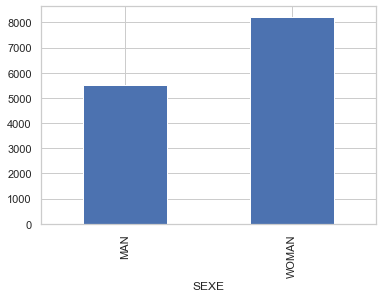

In [43]:
# GENDER
survey_65.groupby(['SEXE']).size().plot.bar()

In [44]:
display(pd.crosstab(data.SEXE, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
SEXE,,
MAN,4099,492
WOMAN,6399,829


In [45]:
data_prep = {'WOMAN': 1,
            'MAN': 0}
data['Gender'] = [data_prep[i] for i in data['SEXE']]

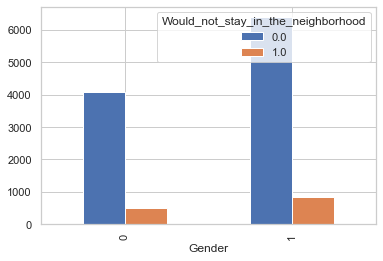

In [46]:
table = pd.crosstab(data.Gender, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

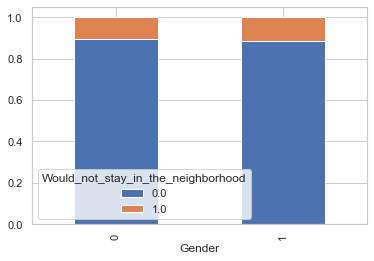

In [47]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

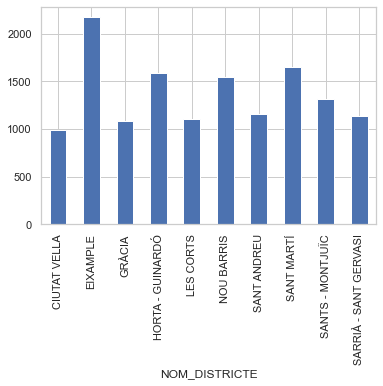

In [48]:
# DISTRICT
survey_65.groupby(['NOM_DISTRICTE']).size().plot.bar()

In [49]:
display(pd.crosstab(data.NOM_DISTRICTE , data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
NOM_DISTRICTE,,
CIUTAT VELLA,679,142
EIXAMPLE,1769,152
GRÀCIA,868,82
HORTA - GUINARDÓ,1200,165
LES CORTS,969,43
NOU BARRIS,1051,201
SANT ANDREU,867,143
SANT MARTÍ,1239,155
SANTS - MONTJUÏC,898,191


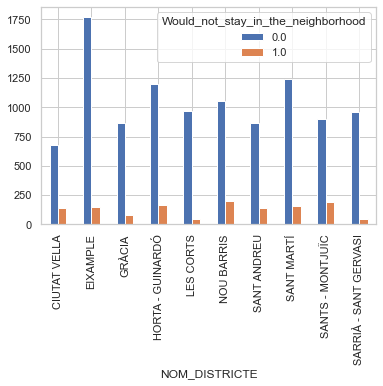

In [50]:
table = pd.crosstab(data.NOM_DISTRICTE, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

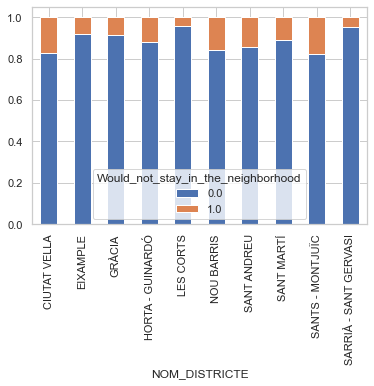

In [51]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

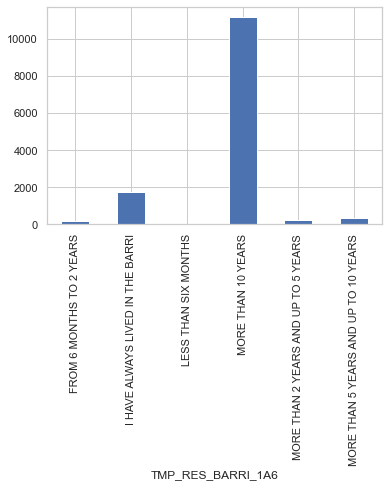

In [52]:
# HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?
survey_65.groupby(['TMP_RES_BARRI_1A6']).size().plot.bar()

In [53]:
display(pd.crosstab(data.TMP_RES_BARRI_1A6, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
TMP_RES_BARRI_1A6,,
FROM 6 MONTHS TO 2 YEARS,118,31
I HAVE ALWAYS LIVED IN THE BARRI,1449,110
LESS THAN SIX MONTHS,33,9
MORE THAN 10 YEARS,8525,1060
MORE THAN 2 YEARS AND UP TO 5 YEARS,143,49
MORE THAN 5 YEARS AND UP TO 10 YEARS,230,62


In [54]:
data.TMP_RES_BARRI_1A6.unique()

array(['MORE THAN 10 YEARS', 'MORE THAN 5 YEARS AND UP TO 10 YEARS',
       'I HAVE ALWAYS LIVED IN THE BARRI', 'FROM 6 MONTHS TO 2 YEARS',
       'MORE THAN 2 YEARS AND UP TO 5 YEARS', 'LESS THAN SIX MONTHS'],
      dtype=object)

In [55]:
data_prep = {'I HAVE ALWAYS LIVED IN THE BARRI': 'I HAVE ALWAYS LIVED IN THE CITY',
             'MORE THAN 10 YEARS': 'MORE THAN 10 YEARS', 
             'MORE THAN 5 YEARS AND UP TO 10 YEARS': 'LESS THAN 10 YEARS',
             'MORE THAN 2 YEARS AND UP TO 5 YEARS': 'LESS THAN 10 YEARS', 
             'FROM 6 MONTHS TO 2 YEARS': 'LESS THAN 10 YEARS',
             'LESS THAN SIX MONTHS': 'LESS THAN 10 YEARS'}
data['Time_living_in_barri'] = [data_prep[i] for i in data['TMP_RES_BARRI_1A6']]

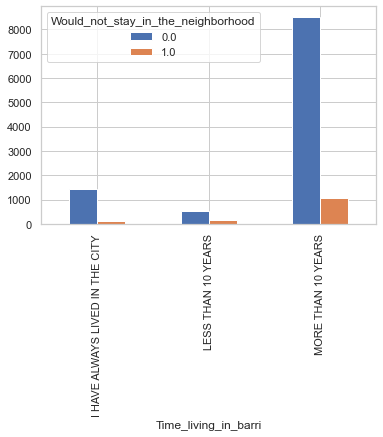

In [56]:
table = pd.crosstab(data.Time_living_in_barri, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

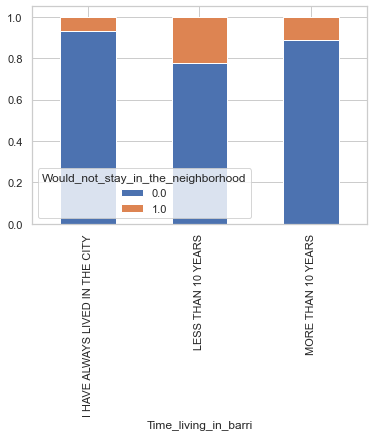

In [57]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

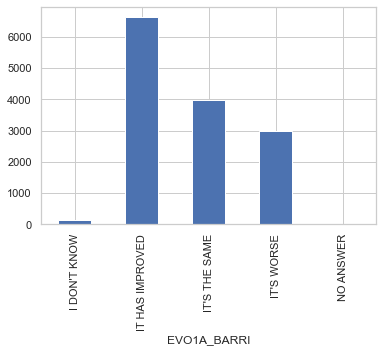

In [58]:
# IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?
survey_65.groupby(['EVO1A_BARRI']).size().plot.bar()

In [59]:
display(pd.crosstab(data.EVO1A_BARRI, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_BARRI,,
I DON'T KNOW,86,18
IT HAS IMPROVED,5384,521
IT'S THE SAME,3135,343
IT'S WORSE,1891,439
NO ANSWER,2,0


In [60]:
data.EVO1A_BARRI.unique()

array(["IT'S WORSE", "IT'S THE SAME", 'IT HAS IMPROVED', "I DON'T KNOW",
       'NO ANSWER'], dtype=object)

In [61]:
data_prep = {"IT'S WORSE": "IT IS WORSE", 
             "IT'S THE SAME": "IT IS THE SAME", 
             'IT HAS IMPROVED': "IT HAS IMPROVED", 
             "I DON'T KNOW": np.nan,
             'NO ANSWER': np.nan}
data['Barri_evolution'] = [data_prep[i] for i in data['EVO1A_BARRI']]

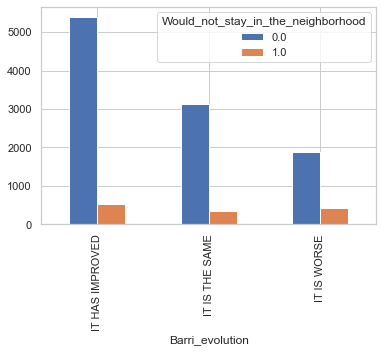

In [62]:
table = pd.crosstab(data.Barri_evolution, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

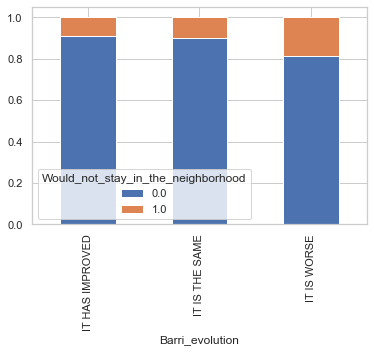

In [63]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [64]:
# Replacing "I DON'T KNOW" answer with the 'neutral' response "IT IS THE SAME"
data_prep2 = {"IT'S WORSE": "IT IS WORSE", 
             "IT'S THE SAME": "IT IS THE SAME", 
             'IT HAS IMPROVED': "IT HAS IMPROVED", 
             "I DON'T KNOW": "IT IS THE SAME",
             'NO ANSWER': np.nan}
data['Barri_evolution2'] = [data_prep2[i] for i in data['EVO1A_BARRI']]

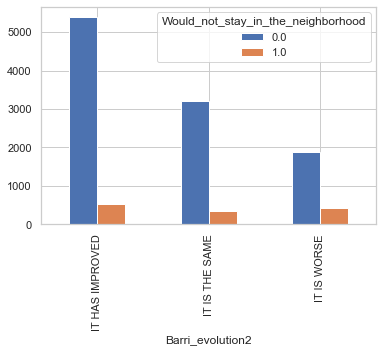

In [65]:
table = pd.crosstab(data.Barri_evolution2, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

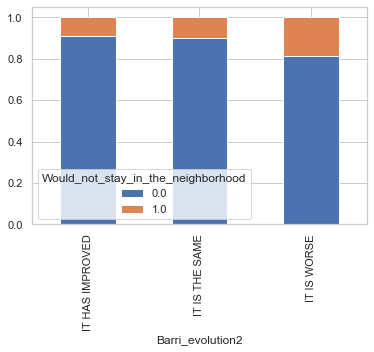

In [66]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

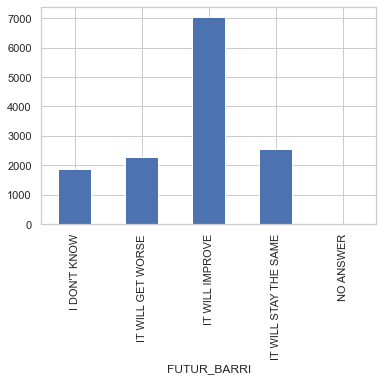

In [67]:
# AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR GET WORSE?
survey_65.groupby(['FUTUR_BARRI']).size().plot.bar()

In [68]:
display(pd.crosstab(data.FUTUR_BARRI, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
FUTUR_BARRI,,
I DON'T KNOW,1392,183
IT WILL GET WORSE,1395,355
IT WILL IMPROVE,5720,553
IT WILL STAY THE SAME,1988,230
NO ANSWER,3,0


In [69]:
data.FUTUR_BARRI.unique()

array(['IT WILL GET WORSE', 'IT WILL STAY THE SAME', 'IT WILL IMPROVE',
       "I DON'T KNOW", 'NO ANSWER'], dtype=object)

In [70]:
data_prep = {'IT WILL GET WORSE': "IT WILL GET WORSE", 
             'IT WILL IMPROVE': "IT WILL IMPROVE", 
             'IT WILL STAY THE SAME': "IT WILL STAY THE SAME",
             "I DON'T KNOW": np.nan, 
             'NO ANSWER': np.nan}
data['Barri_future'] = [data_prep[i] for i in data['FUTUR_BARRI']]

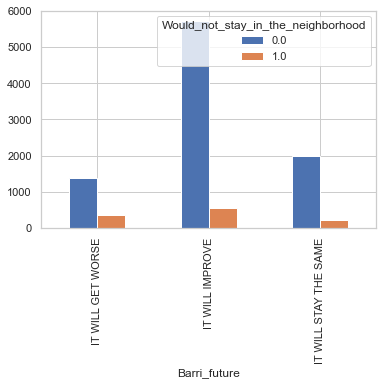

In [71]:
table = pd.crosstab(data.Barri_future, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

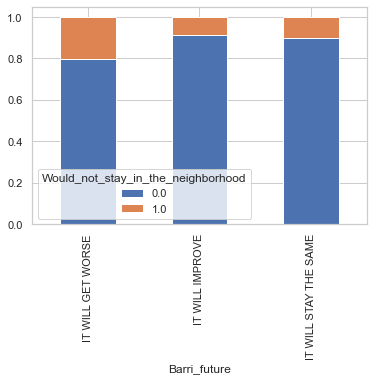

In [72]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [73]:
# Replacing "I DON'T KNOW" answer with the 'neutral' response "IT IS THE SAME"
data_prep2 = {'IT WILL GET WORSE': "IT WILL GET WORSE", 
             'IT WILL IMPROVE': "IT WILL IMPROVE", 
             'IT WILL STAY THE SAME': "IT WILL STAY THE SAME",
             "I DON'T KNOW": "IT WILL STAY THE SAME", 
             'NO ANSWER': np.nan}
data['Barri_future2'] = [data_prep2[i] for i in data['FUTUR_BARRI']]

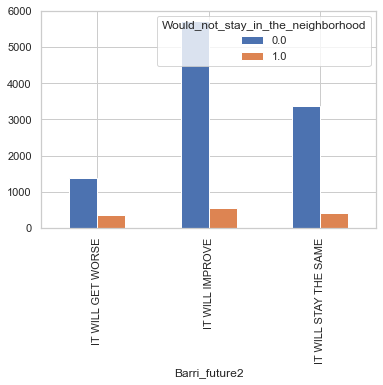

In [74]:
table = pd.crosstab(data.Barri_future2, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

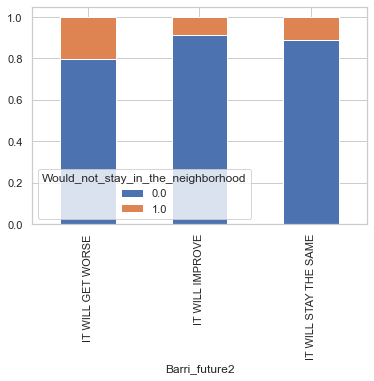

In [75]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

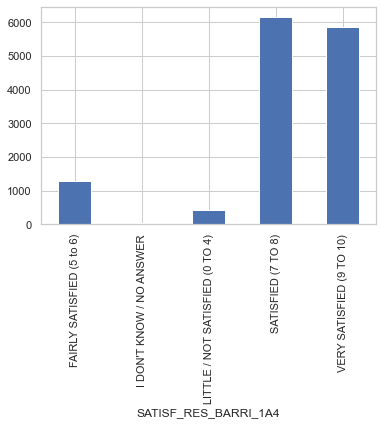

In [76]:
# ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD? - GROUPED
survey_65.groupby(['SATISF_RES_BARRI_1A4']).size().plot.bar()

In [77]:
display(pd.crosstab(data.SATISF_RES_BARRI_1A4, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
SATISF_RES_BARRI_1A4,,
FAIRLY SATISFIED (5 to 6),616,273
I DON'T KNOW / NO ANSWER,26,10
LITTLE / NOT SATISFIED (0 TO 4),87,147
SATISFIED (7 TO 8),4652,615
VERY SATISFIED (9 TO 10),5117,276


In [78]:
data.SATISF_RES_BARRI_1A4.unique()

array(['FAIRLY SATISFIED (5 to 6)', 'VERY SATISFIED (9 TO 10)',
       'SATISFIED (7 TO 8)', 'LITTLE / NOT SATISFIED (0 TO 4)',
       "I DON'T KNOW / NO ANSWER"], dtype=object)

In [79]:
data_prep = {'SATISFIED (7 TO 8)': 'SATISFIED', 
             'VERY SATISFIED (9 TO 10)': 'SATISFIED',
             'FAIRLY SATISFIED (5 to 6)': 'NOT SATISFIED', 
             'LITTLE / NOT SATISFIED (0 TO 4)': 'NOT SATISFIED',
             "I DON'T KNOW / NO ANSWER": np.nan}
data['Barri_satisfaction_of_living'] = [data_prep[i] for i in data['SATISF_RES_BARRI_1A4']]

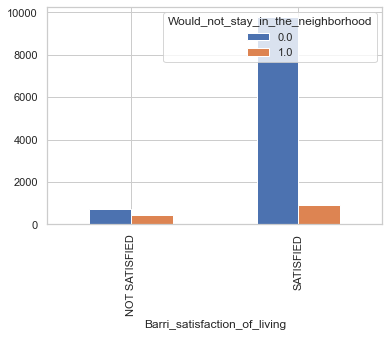

In [80]:
table = pd.crosstab(data.Barri_satisfaction_of_living, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

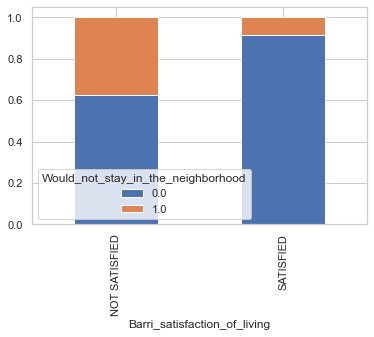

In [81]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

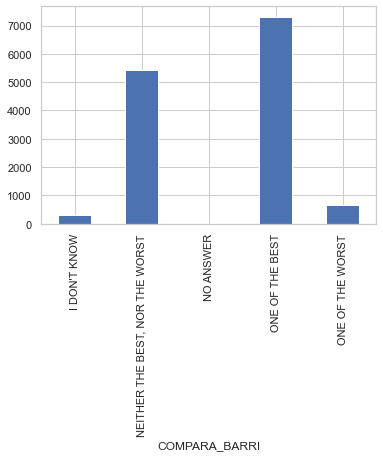

In [82]:
# DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?
survey_65.groupby(['COMPARA_BARRI']).size().plot.bar()

In [83]:
display(pd.crosstab(data.COMPARA_BARRI, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
COMPARA_BARRI,,
I DON'T KNOW,225,34
"NEITHER THE BEST, NOR THE WORST",3673,773
NO ANSWER,4,2
ONE OF THE BEST,6357,291
ONE OF THE WORST,239,221


In [84]:
data.COMPARA_BARRI.unique()

array(['NEITHER THE BEST, NOR THE WORST', 'ONE OF THE BEST',
       'ONE OF THE WORST', "I DON'T KNOW", 'NO ANSWER'], dtype=object)

In [85]:
data_prep = {'NEITHER THE BEST, NOR THE WORST': 'NEITHER THE BEST, NOR THE WORST', 
             'ONE OF THE BEST': 'ONE OF THE BEST',
             'ONE OF THE WORST': 'ONE OF THE WORST', 
             "I DON'T KNOW": np.nan, 
             'NO ANSWER': np.nan}
data['Barri_comparison'] = [data_prep[i] for i in data['COMPARA_BARRI']]

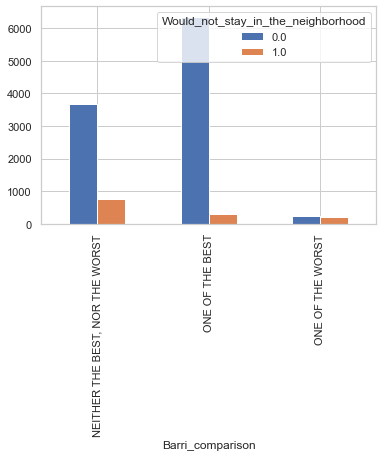

In [86]:
table = pd.crosstab(data.Barri_comparison, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

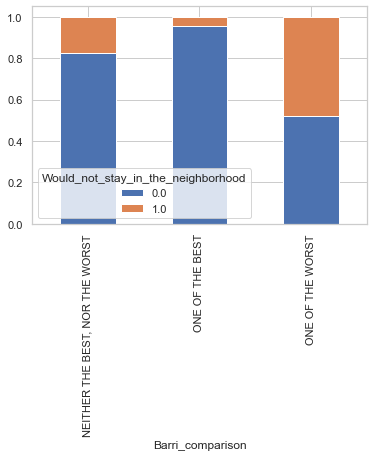

In [87]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [88]:
# Replacing "I DON'T KNOW" answer with the 'neutral' response "NEITHER THE BEST, NOR THE WORST"
data_prep2 = {'NEITHER THE BEST, NOR THE WORST': 'NEITHER THE BEST, NOR THE WORST', 
             'ONE OF THE BEST': 'ONE OF THE BEST',
             'ONE OF THE WORST': 'ONE OF THE WORST', 
             "I DON'T KNOW": 'NEITHER THE BEST, NOR THE WORST', 
             'NO ANSWER': np.nan}
data['Barri_comparison2'] = [data_prep2[i] for i in data['COMPARA_BARRI']]

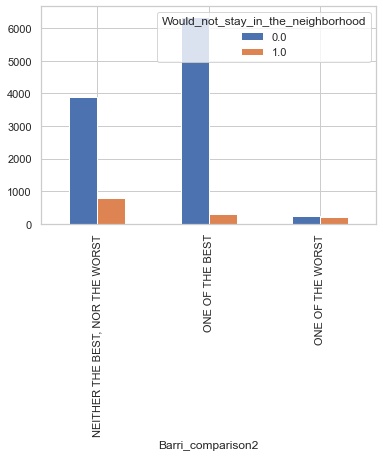

In [89]:
table = pd.crosstab(data.Barri_comparison2, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

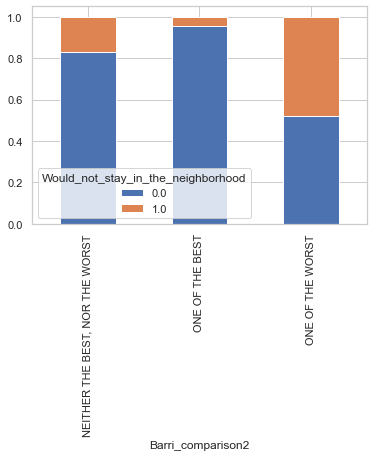

In [90]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [91]:
survey_65.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'NOM_BARRI',
 'GRANBARRI',
 'SEXE',
 'EDAT1899_1A6',
 'NACIO_ACT_UE',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'EVO1A_BCN',
 'FUTUR_BCN',
 'SATISF_RES_BCN_1A4',
 'VAL_GESTMUNI_1A2',
 'VAL_ESCOMBRARIES_1A2',
 'VAL_NETEJA_1A2',
 'VAL_VERD_1A2',
 'VAL_ENLLUM_1A2',
 'VAL_URBA_1A2',
 'VAL_ASFALT_1A2',
 'VAL_FACANES_1A2',
 'VAL_CIRCUL_1A2',
 'VAL_APARCA_1A2',
 'VAL_BUS_1A2',
 'VAL_METRO_1A2',
 'VAL_GUB_1A2',
 'VAL_SEGUR_1A2',
 'VAL_SEGUR_BARRI_1A2',
 'VAL_ESPORT_1A2',
 'VAL_SIAC_1A2',
 'VAL_CSS_1A2',
 'VAL_CULT_1A2',
 'VAL_FESTESPOP_1A2',
 'VAL_MERCAT_1A2',
 'VAL_BIBLIO_1A2',
 'TRANSP_MOU',
 'VAL_TRANSP_1A3',
 'VAL_TRANSP_BARRI_1A3',
 'EVO1A_BARRI',
 'FUTUR_BARRI',
 'SATISF_RES_BARRI_1A4',
 'COMPARA_BARRI',
 'CANVI_LLOC_RES_1A3',
 'VAL_GESTBARRI_1A2',
 'HAB_COTXE_PART',
 'HAB_M2_1A14',
 'LLAR_INGRESSOS_1A10',
 'CLASSESOC_ENT',
 'SENTPERTI',
 'LLOC_NAIX_1A4',
 'LLENGUA_HAB',
 'ESTUDIS_1A6',
 'RESUM_PARENTIU',
 'HAB_RES_1A4']

In [92]:
for x in ['VAL_ESCOMBRARIES_1A2', 'VAL_NETEJA_1A2', 'VAL_VERD_1A2', 'VAL_ENLLUM_1A2', 'VAL_URBA_1A2',
          'VAL_ASFALT_1A2', 'VAL_FACANES_1A2', 'VAL_CIRCUL_1A2', 'VAL_APARCA_1A2', 'VAL_BUS_1A2',
          'VAL_METRO_1A2', 'VAL_GUB_1A2', 'VAL_SEGUR_1A2', 'VAL_SEGUR_BARRI_1A2', 'VAL_ESPORT_1A2', 'VAL_SIAC_1A2',
          'VAL_CSS_1A2', 'VAL_CULT_1A2', 'VAL_FESTESPOP_1A2', 'VAL_MERCAT_1A2', 'VAL_BIBLIO_1A2']:
    display(pd.crosstab(data[x], data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ESCOMBRARIES_1A2,,
BAD (0 TO 4),504,102
GOOD (5 TO 10),9954,1212
I DON'T KNOW / NO ANSWER,40,7


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_NETEJA_1A2,,
BAD (0 TO 4),1568,300
GOOD (5 TO 10),8903,1019
I DON'T KNOW / NO ANSWER,27,2


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_VERD_1A2,,
BAD (0 TO 4),1591,305
GOOD (5 TO 10),8396,965
I DON'T KNOW / NO ANSWER,511,51


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ENLLUM_1A2,,
BAD (0 TO 4),882,159
GOOD (5 TO 10),9430,1136
I DON'T KNOW / NO ANSWER,186,26


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_URBA_1A2,,
BAD (0 TO 4),1064,213
GOOD (5 TO 10),8176,951
I DON'T KNOW / NO ANSWER,1258,157


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ASFALT_1A2,,
BAD (0 TO 4),2122,356
GOOD (5 TO 10),8246,949
I DON'T KNOW / NO ANSWER,130,16


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_FACANES_1A2,,
BAD (0 TO 4),1076,208
GOOD (5 TO 10),8748,1040
I DON'T KNOW / NO ANSWER,674,73


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CIRCUL_1A2,,
BAD (0 TO 4),3066,451
GOOD (5 TO 10),6873,803
I DON'T KNOW / NO ANSWER,559,67


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_APARCA_1A2,,
BAD (0 TO 4),5709,779
GOOD (5 TO 10),3150,343
I DON'T KNOW / NO ANSWER,1639,199


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_BUS_1A2,,
BAD (0 TO 4),893,180
GOOD (5 TO 10),9023,1092
I DON'T KNOW / NO ANSWER,582,49


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_METRO_1A2,,
BAD (0 TO 4),266,51
GOOD (5 TO 10),8891,1147
I DON'T KNOW / NO ANSWER,1341,123


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_GUB_1A2,,
BAD (0 TO 4),1722,284
GOOD (5 TO 10),7494,887
I DON'T KNOW / NO ANSWER,1282,150


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SEGUR_1A2,,
BAD (0 TO 4),3167,500
GOOD (5 TO 10),6799,749
I DON'T KNOW / NO ANSWER,532,72


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SEGUR_BARRI_1A2,,
BAD (0 TO 4),2505,520
GOOD (5 TO 10),7862,780
I DON'T KNOW / NO ANSWER,131,21


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ESPORT_1A2,,
BAD (0 TO 4),834,182
GOOD (5 TO 10),5379,688
I DON'T KNOW / NO ANSWER,4285,451


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SIAC_1A2,,
BAD (0 TO 4),555,107
GOOD (5 TO 10),6946,890
I DON'T KNOW / NO ANSWER,2997,324


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CSS_1A2,,
BAD (0 TO 4),712,141
GOOD (5 TO 10),5350,645
I DON'T KNOW / NO ANSWER,4436,535


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CULT_1A2,,
BAD (0 TO 4),350,78
GOOD (5 TO 10),6915,851
I DON'T KNOW / NO ANSWER,3233,392


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_FESTESPOP_1A2,,
BAD (0 TO 4),624,122
GOOD (5 TO 10),7482,860
I DON'T KNOW / NO ANSWER,2392,339


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_MERCAT_1A2,,
BAD (0 TO 4),628,107
GOOD (5 TO 10),8813,1108
I DON'T KNOW / NO ANSWER,1057,106


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_BIBLIO_1A2,,
BAD (0 TO 4),164,29
GOOD (5 TO 10),6340,854
I DON'T KNOW / NO ANSWER,3994,438


VAL_URBA_1A2, VAL_APARCA_1A2, VAL_METRO_1A2, VAL_ESPORT_1A2, VAL_SIAC_1A2, VAL_CSS_1A2, VAL_CULT_1A2, VAL_FESTESPOP_1A2, VAL_BIBLIO_1A2 - too many I DON'T KNOW / NO ANSWER values

In [93]:
data_prep = {'GOOD (5 TO 10)': 'GOOD', 
             'BAD (0 TO 4)': 'BAD',
            "I DON'T KNOW / NO ANSWER": np.nan}
for x in ['VAL_ESCOMBRARIES_1A2', 'VAL_NETEJA_1A2', 'VAL_VERD_1A2', 'VAL_ENLLUM_1A2',
          'VAL_ASFALT_1A2', 'VAL_FACANES_1A2', 'VAL_CIRCUL_1A2', 'VAL_BUS_1A2',
          'VAL_GUB_1A2', 'VAL_SEGUR_1A2', 'VAL_SEGUR_BARRI_1A2', 'VAL_MERCAT_1A2']:
    data[questions_dict[x][22:][:-10]] = [data_prep[i] for i in data[x]]

C:\Users\THINK\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


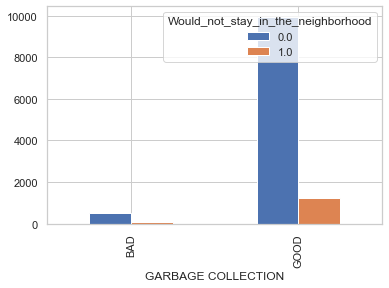

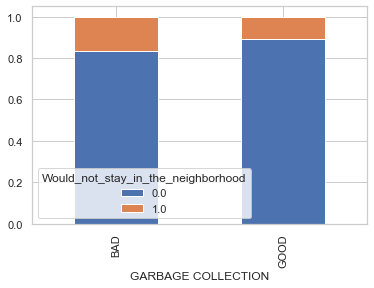

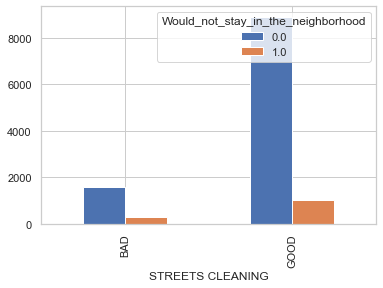

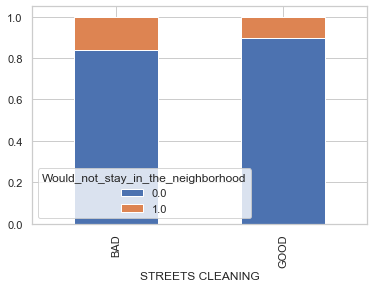

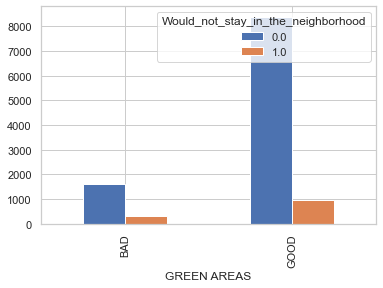

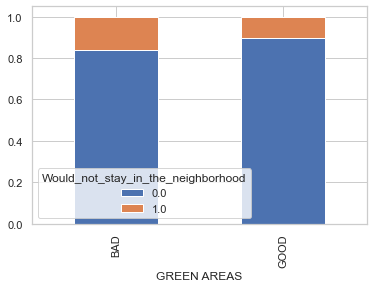

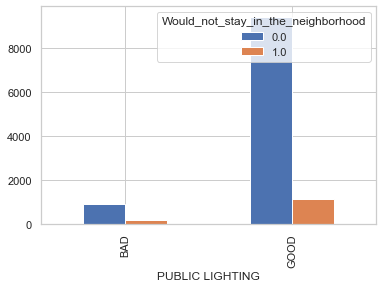

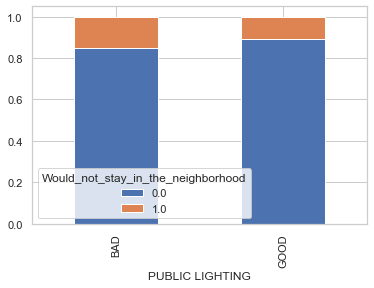

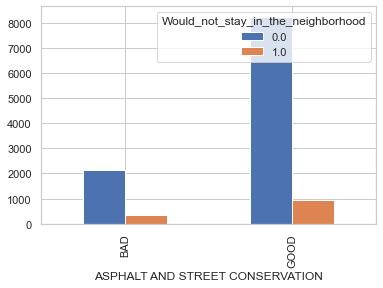

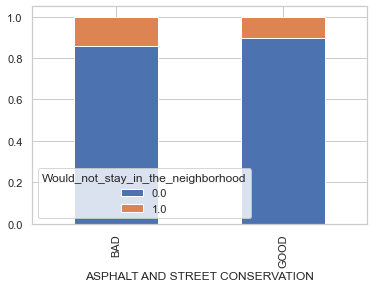

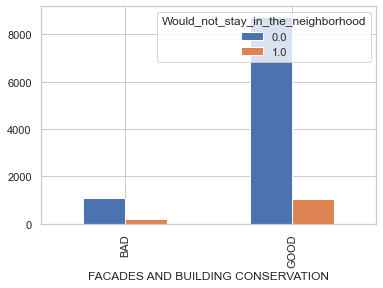

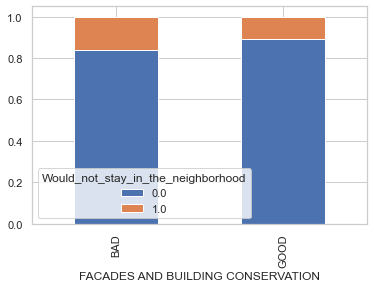

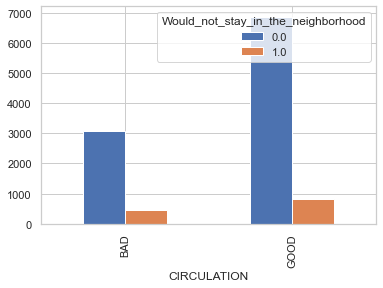

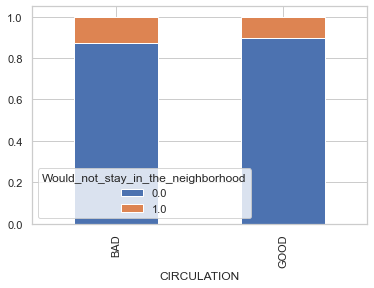

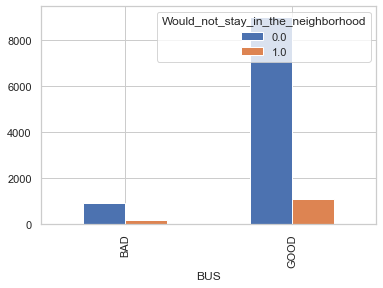

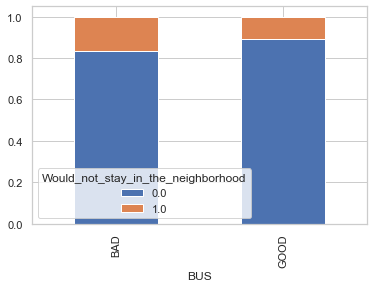

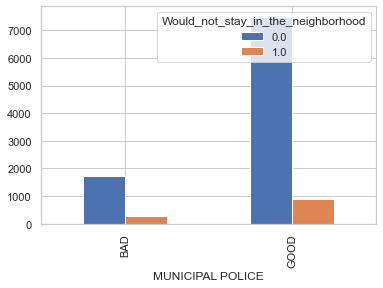

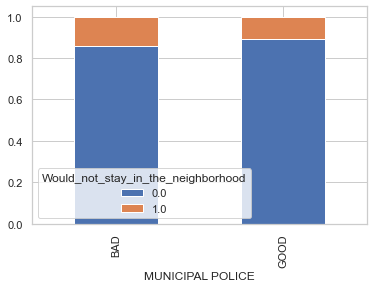

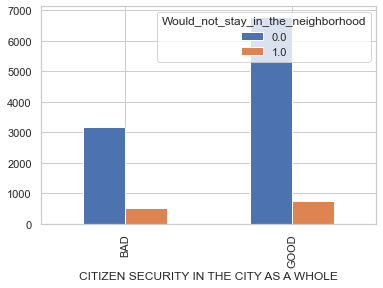

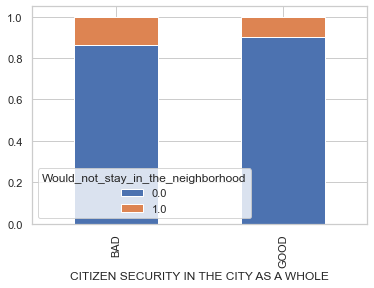

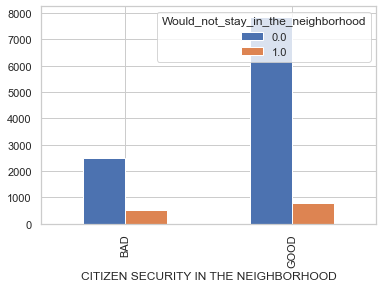

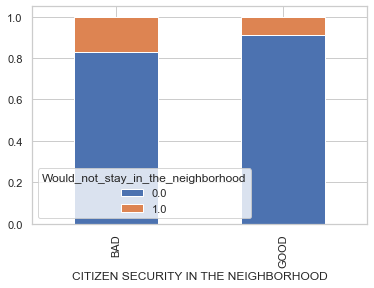

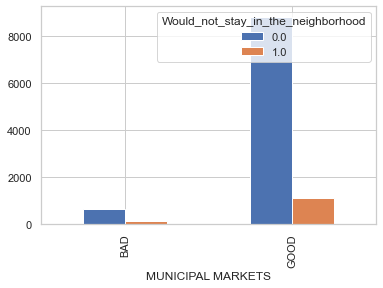

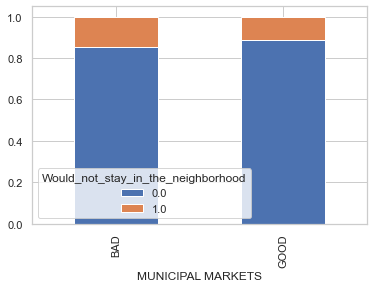

In [94]:
for x in ['VAL_ESCOMBRARIES_1A2', 'VAL_NETEJA_1A2', 'VAL_VERD_1A2', 'VAL_ENLLUM_1A2',
          'VAL_ASFALT_1A2', 'VAL_FACANES_1A2', 'VAL_CIRCUL_1A2', 'VAL_BUS_1A2',
          'VAL_GUB_1A2', 'VAL_SEGUR_1A2', 'VAL_SEGUR_BARRI_1A2', 'VAL_MERCAT_1A2']:
    table = pd.crosstab(data[questions_dict[x][22:][:-10]], data.Would_not_stay_in_the_neighborhood)
    table.plot(kind='bar')
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

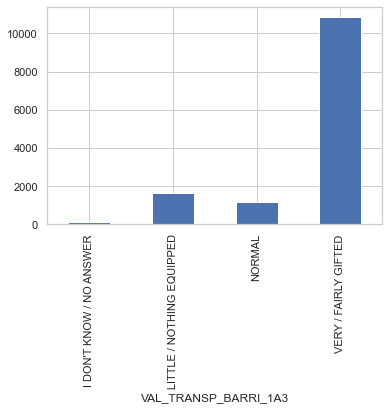

In [95]:
# IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY? - GROUPED
survey_65.groupby(['VAL_TRANSP_BARRI_1A3']).size().plot.bar()

In [96]:
display(pd.crosstab(data.VAL_TRANSP_BARRI_1A3, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_TRANSP_BARRI_1A3,,
I DON'T KNOW / NO ANSWER,70,8
LITTLE / NOTHING EQUIPPED,1162,217
NORMAL,809,149
VERY / FAIRLY GIFTED,8457,947


In [97]:
data.VAL_TRANSP_BARRI_1A3.unique()

array(['VERY / FAIRLY GIFTED', 'NORMAL', "I DON'T KNOW / NO ANSWER",
       'LITTLE / NOTHING EQUIPPED'], dtype=object)

In [98]:
data_prep = {'VERY / FAIRLY GIFTED': "GOOD", 
             'NORMAL': "NORMAL", 
             'LITTLE / NOTHING EQUIPPED': "BAD",
             "I DON'T KNOW / NO ANSWER": np.nan}
data['Barri_transport'] = [data_prep[i] for i in data['VAL_TRANSP_BARRI_1A3']]

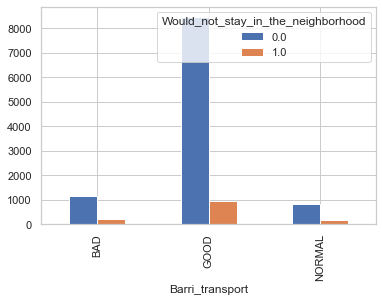

In [99]:
table = pd.crosstab(data.Barri_transport, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

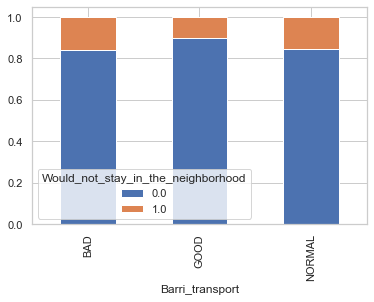

In [100]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

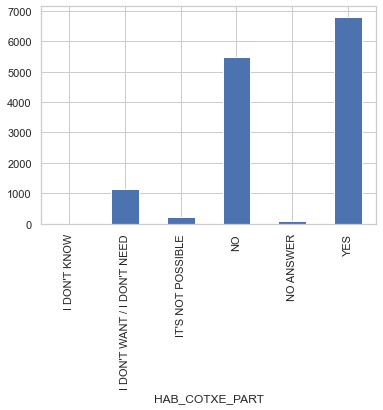

In [101]:
# DO YOU HAVE: PRIVATE CAR
survey_65.groupby(['HAB_COTXE_PART']).size().plot.bar()

In [102]:
display(pd.crosstab(data.HAB_COTXE_PART, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_COTXE_PART,,
I DON'T KNOW,2,0
I DON'T WANT / I DON'T NEED,848,136
IT'S NOT POSSIBLE,151,32
NO,4352,495
NO ANSWER,72,12
YES,5073,646


In [103]:
data.HAB_COTXE_PART.unique()

array(['NO', 'YES', 'NO ANSWER', "I DON'T KNOW",
       "I DON'T WANT / I DON'T NEED", "IT'S NOT POSSIBLE"], dtype=object)

In [104]:
data_prep = {'NO': 0, 
             'YES': 1, 
             'NO ANSWER': np.nan, 
             "I DON'T KNOW": np.nan,
             "I DON'T WANT / I DON'T NEED": 0, 
             "IT'S NOT POSSIBLE": 0}
data['Owns_a_car'] = [data_prep[i] for i in data['HAB_COTXE_PART']]

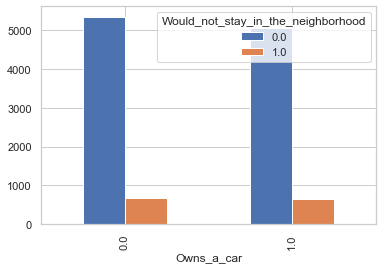

In [105]:
table = pd.crosstab(data.Owns_a_car, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

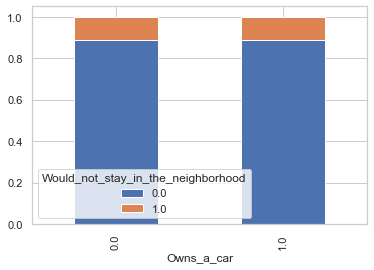

In [106]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

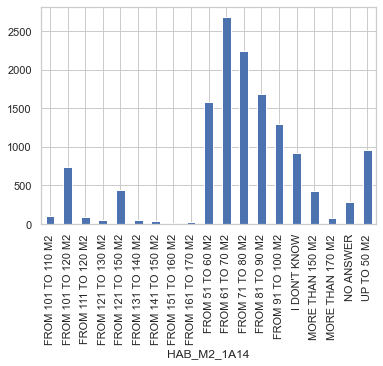

In [107]:
# HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED
survey_65.groupby(['HAB_M2_1A14']).size().plot.bar()

In [108]:
display(pd.crosstab(data.HAB_M2_1A14, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_M2_1A14,,
FROM 101 TO 110 M2,79,10
FROM 101 TO 120 M2,616,51
FROM 111 TO 120 M2,70,5
FROM 121 TO 130 M2,42,7
FROM 121 TO 150 M2,376,23
FROM 131 TO 140 M2,38,3
FROM 141 TO 150 M2,28,3
FROM 151 TO 160 M2,14,1
FROM 161 TO 170 M2,18,2


In [109]:
data.HAB_M2_1A14.unique()

array(['FROM 61 TO 70 M2', 'FROM 51 TO 60 M2', 'UP TO 50 M2',
       'FROM 81 TO 90 M2', 'FROM 91 TO 100 M2', 'MORE THAN 150 M2',
       'FROM 71 TO 80 M2', 'NO ANSWER', "I DON'T KNOW",
       'FROM 101 TO 120 M2', 'FROM 121 TO 150 M2', 'FROM 101 TO 110 M2',
       'MORE THAN 170 M2', 'FROM 111 TO 120 M2', 'FROM 121 TO 130 M2',
       'FROM 141 TO 150 M2', 'FROM 131 TO 140 M2', 'FROM 161 TO 170 M2',
       'FROM 151 TO 160 M2'], dtype=object)

In [110]:
data_prep = {'UP TO 50 M2': '< 50 M2', 
             'FROM 51 TO 60 M2': '51-100 M2', 
             'FROM 61 TO 70 M2': '51-100 M2', 
             'FROM 71 TO 80 M2': '51-100 M2', 
             'FROM 81 TO 90 M2': '51-100 M2', 
             'FROM 91 TO 100 M2': '51-100 M2', 
             'FROM 101 TO 120 M2': '101-150 M2', 
             'FROM 101 TO 110 M2': '101-150 M2',
             'FROM 111 TO 120 M2': '101-150 M2', 
             'FROM 121 TO 150 M2': '101-150 M2', 
             'FROM 121 TO 130 M2': '101-150 M2',
             'FROM 131 TO 140 M2': '101-150 M2', 
             'FROM 141 TO 150 M2': '101-150 M2', 
             'FROM 151 TO 160 M2': '> 150 M2',
             'FROM 161 TO 170 M2': '> 150 M2',
             'MORE THAN 150 M2': '> 150 M2',
             'MORE THAN 170 M2': '> 150 M2',
             'NO ANSWER': np.nan, #'51-100 M2', # inserting most common value
             "I DON'T KNOW": np.nan } #'51-100 M2'} # inserting most common value
data['House_size'] = [data_prep[i] for i in data['HAB_M2_1A14']]

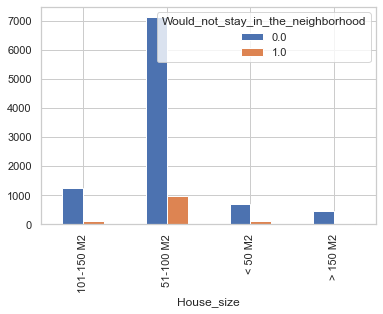

In [111]:
table = pd.crosstab(data.House_size, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

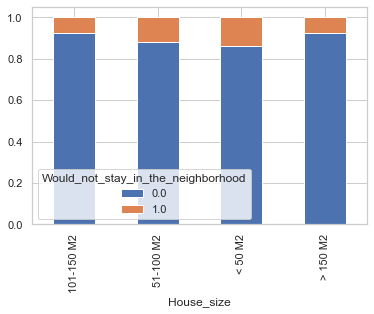

In [112]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [113]:
# Replacing "I DON'T KNOW" answer with the most common response '51-100 M2'
data_prep2 = {'UP TO 50 M2': '< 50 M2', 
             'FROM 51 TO 60 M2': '51-100 M2', 
             'FROM 61 TO 70 M2': '51-100 M2', 
             'FROM 71 TO 80 M2': '51-100 M2', 
             'FROM 81 TO 90 M2': '51-100 M2', 
             'FROM 91 TO 100 M2': '51-100 M2', 
             'FROM 101 TO 120 M2': '101-150 M2', 
             'FROM 101 TO 110 M2': '101-150 M2',
             'FROM 111 TO 120 M2': '101-150 M2', 
             'FROM 121 TO 150 M2': '101-150 M2', 
             'FROM 121 TO 130 M2': '101-150 M2',
             'FROM 131 TO 140 M2': '101-150 M2', 
             'FROM 141 TO 150 M2': '101-150 M2', 
             'FROM 151 TO 160 M2': '> 150 M2',
             'FROM 161 TO 170 M2': '> 150 M2',
             'MORE THAN 150 M2': '> 150 M2',
             'MORE THAN 170 M2': '> 150 M2',
             'NO ANSWER': np.nan,
             "I DON'T KNOW": '51-100 M2'} # inserting most common value
data['House_size2'] = [data_prep2[i] for i in data['HAB_M2_1A14']]

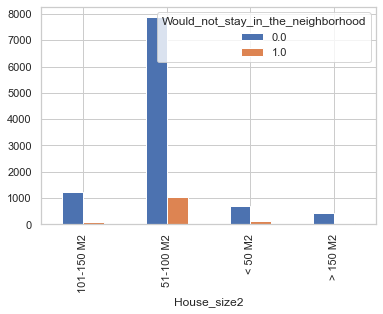

In [114]:
table = pd.crosstab(data.House_size2, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

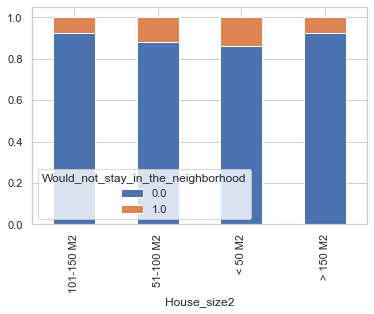

In [115]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

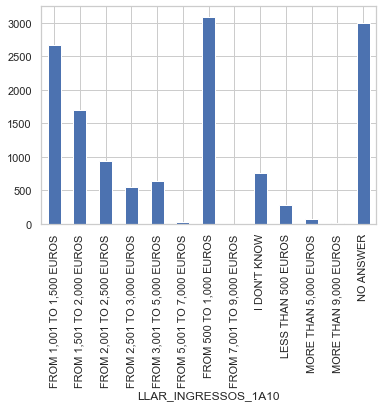

In [116]:
# WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED
survey_65.groupby(['LLAR_INGRESSOS_1A10']).size().plot.bar()

In [117]:
display(pd.crosstab(data.LLAR_INGRESSOS_1A10, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
LLAR_INGRESSOS_1A10,,
"FROM 1,001 TO 1,500 EUROS",2018,256
"FROM 1,501 TO 2,000 EUROS",1253,178
"FROM 2,001 TO 2,500 EUROS",724,88
"FROM 2,501 TO 3,000 EUROS",414,54
"FROM 3,001 TO 5,000 EUROS",507,53
"FROM 5,001 TO 7,000 EUROS",26,3
"FROM 500 TO 1,000 EUROS",2340,326
"FROM 7,001 TO 9,000 EUROS",5,0
I DON'T KNOW,616,53


In [118]:
data.LLAR_INGRESSOS_1A10.unique()

array(['FROM 500 TO 1,000 EUROS', 'FROM 2,001 TO 2,500 EUROS',
       'FROM 1,001 TO 1,500 EUROS', 'FROM 1,501 TO 2,000 EUROS',
       'NO ANSWER', "I DON'T KNOW", 'FROM 3,001 TO 5,000 EUROS',
       'LESS THAN 500 EUROS', 'FROM 2,501 TO 3,000 EUROS',
       'MORE THAN 5,000 EUROS', 'FROM 5,001 TO 7,000 EUROS',
       'FROM 7,001 TO 9,000 EUROS', 'MORE THAN 9,000 EUROS'], dtype=object)

In [119]:
data_prep = {'LESS THAN 500 EUROS': '< 1000 EUROS',
             'FROM 500 TO 1,000 EUROS': '< 1000 EUROS',
             'FROM 1,001 TO 1,500 EUROS': '1001-2000 EUROS',
             'FROM 1,501 TO 2,000 EUROS': '1001-2000 EUROS', 
             'FROM 2,001 TO 2,500 EUROS': '2001-3000 EUROS',
             'FROM 2,501 TO 3,000 EUROS': '2001-3000 EUROS',
             'FROM 3,001 TO 5,000 EUROS': '> 3000 EUROS', 
             'FROM 5,001 TO 7,000 EUROS': '> 3000 EUROS', 
             'FROM 7,001 TO 9,000 EUROS': '> 3000 EUROS',
             'MORE THAN 9,000 EUROS': '> 3000 EUROS',
             'MORE THAN 5,000 EUROS': '> 3000 EUROS',
             'NO ANSWER': np.nan,
             "I DON'T KNOW": np.nan             
             } 
data['Monthly_family_income'] = [data_prep[i] for i in data['LLAR_INGRESSOS_1A10']]

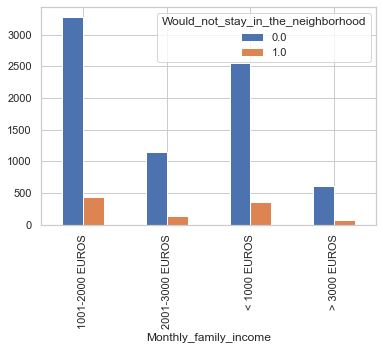

In [120]:
table = pd.crosstab(data.Monthly_family_income, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

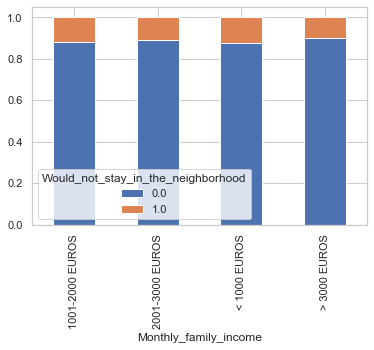

In [121]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [122]:
# Replacing "I DON'T KNOW" asnwer with the most common reponse '< 1000 EUROS'
data_prep2 = {'LESS THAN 500 EUROS': '< 1000 EUROS',
             'FROM 500 TO 1,000 EUROS': '< 1000 EUROS',
             'FROM 1,001 TO 1,500 EUROS': '1001-2000 EUROS',
             'FROM 1,501 TO 2,000 EUROS': '1001-2000 EUROS', 
             'FROM 2,001 TO 2,500 EUROS': '2001-3000 EUROS',
             'FROM 2,501 TO 3,000 EUROS': '2001-3000 EUROS',
             'FROM 3,001 TO 5,000 EUROS': '> 3000 EUROS', 
             'FROM 5,001 TO 7,000 EUROS': '> 3000 EUROS', 
             'FROM 7,001 TO 9,000 EUROS': '> 3000 EUROS',
             'MORE THAN 9,000 EUROS': '> 3000 EUROS',
             'MORE THAN 5,000 EUROS': '> 3000 EUROS',
             'NO ANSWER': np.nan,
             "I DON'T KNOW": '< 1000 EUROS'  # inserting most common value           
             } 
data['Monthly_family_income2'] = [data_prep2[i] for i in data['LLAR_INGRESSOS_1A10']]

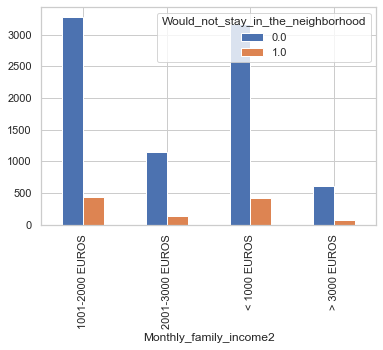

In [123]:
table = pd.crosstab(data.Monthly_family_income2, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

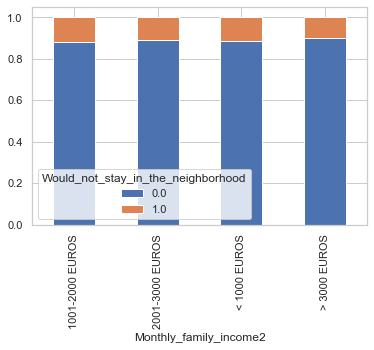

In [124]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

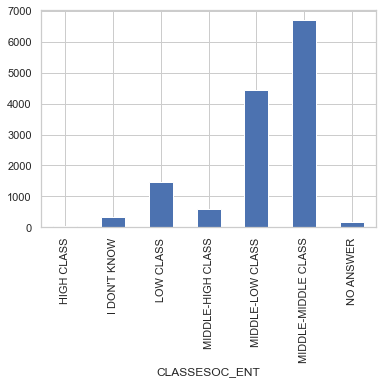

In [125]:
# COULD YOU TELL ME WHAT SOCIAL CLASS DO YOU THINK YOU BELONG TO?
survey_65.groupby(['CLASSESOC_ENT']).size().plot.bar()

In [126]:
display(pd.crosstab(data.CLASSESOC_ENT, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
CLASSESOC_ENT,,
HIGH CLASS,41,2
I DON'T KNOW,252,21
LOW CLASS,1042,170
MIDDLE-HIGH CLASS,480,44
MIDDLE-LOW CLASS,3278,488
MIDDLE-MIDDLE CLASS,5268,578
NO ANSWER,137,18


In [127]:
data.CLASSESOC_ENT.unique()

array(['MIDDLE-HIGH CLASS', 'MIDDLE-MIDDLE CLASS', 'MIDDLE-LOW CLASS',
       "I DON'T KNOW", 'LOW CLASS', 'NO ANSWER', 'HIGH CLASS'],
      dtype=object)

In [128]:
data_prep = {'MIDDLE-HIGH CLASS': 'MIDDLE-HIGH', 
             'MIDDLE-MIDDLE CLASS': 'MIDDLE-MIDDLE', 
             'MIDDLE-LOW CLASS': 'MIDDLE-LOW',
             "I DON'T KNOW": np.nan, #'MIDDLE-MIDDLE', # inserting most common value
             'LOW CLASS': 'LOW', 
             'NO ANSWER': np.nan, #'MIDDLE-MIDDLE', # inserting most common value
             'HIGH CLASS': 'HIGH'} 
data['Social_class'] = [data_prep[i] for i in data['CLASSESOC_ENT']]

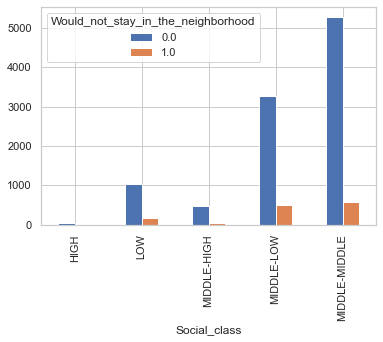

In [129]:
table = pd.crosstab(data.Social_class, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

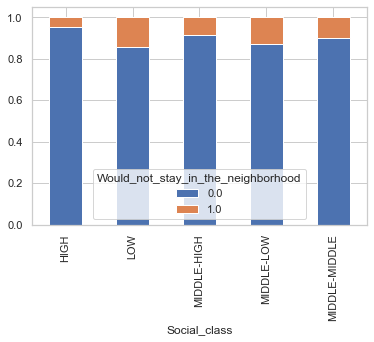

In [130]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [131]:
# Replacing "I DON'T KNOW" answet with the most common response 'MIDDLE-MIDDLE'
data_prep2 = {'MIDDLE-HIGH CLASS': 'MIDDLE-HIGH', 
             'MIDDLE-MIDDLE CLASS': 'MIDDLE-MIDDLE', 
             'MIDDLE-LOW CLASS': 'MIDDLE-LOW',
             "I DON'T KNOW": 'MIDDLE-MIDDLE', # inserting most common value
             'LOW CLASS': 'LOW', 
             'NO ANSWER': np.nan, 
             'HIGH CLASS': 'HIGH'} 
data['Social_class2'] = [data_prep2[i] for i in data['CLASSESOC_ENT']]

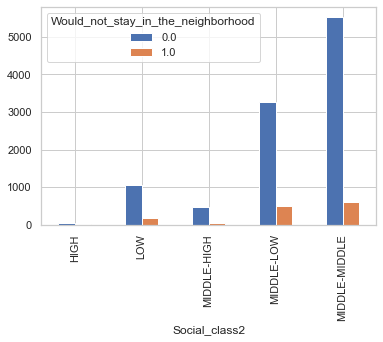

In [132]:
table = pd.crosstab(data.Social_class2, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

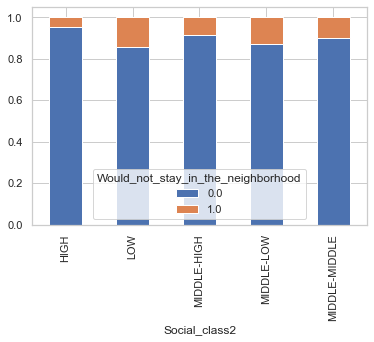

In [133]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

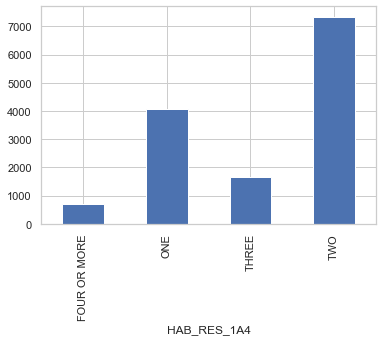

In [134]:
# WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED
survey_65.groupby(['HAB_RES_1A4']).size().plot.bar()

In [135]:
display(pd.crosstab(data.HAB_RES_1A4, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_RES_1A4,,
FOUR OR MORE,508,53
ONE,3172,414
THREE,1226,133
TWO,5592,721


In [136]:
data.HAB_RES_1A4.unique()

array(['ONE', 'TWO', 'THREE', 'FOUR OR MORE'], dtype=object)

In [137]:
data_prep = {'ONE': 1, 
             'TWO': 0, 
             'THREE': 0, 
             'FOUR OR MORE': 0} 
data['Living_alone'] = [data_prep[i] for i in data['HAB_RES_1A4']]

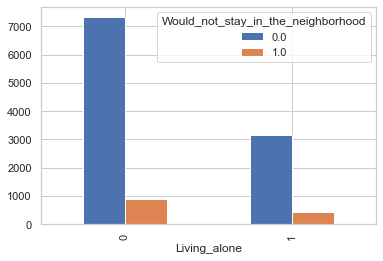

In [138]:
table = pd.crosstab(data.Living_alone, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

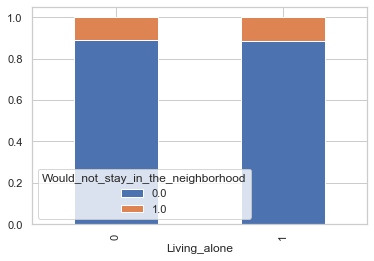

In [139]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

## 1.4.3 Feature engineering

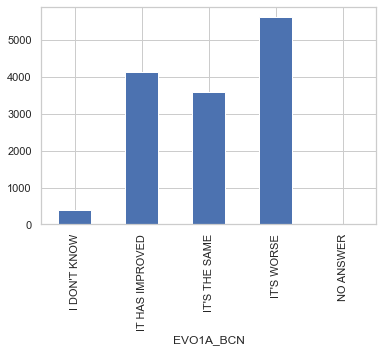

In [140]:
# DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?
survey_65.groupby(['EVO1A_BCN']).size().plot.bar()

In [141]:
display(pd.crosstab(data.EVO1A_BCN, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_BCN,,
I DON'T KNOW,288,27
IT HAS IMPROVED,3355,322
IT'S THE SAME,2858,310
IT'S WORSE,3992,661
NO ANSWER,5,1


In [142]:
data.EVO1A_BCN.unique()

array(["IT'S WORSE", "IT'S THE SAME", 'IT HAS IMPROVED', "I DON'T KNOW",
       'NO ANSWER'], dtype=object)

In [143]:
data_prep = {"IT'S WORSE": "IT IS WORSE", 
             "IT'S THE SAME": "IT IS THE SAME", 
             'IT HAS IMPROVED': "IT HAS IMPROVED", 
             "I DON'T KNOW": np.nan,
             'NO ANSWER': np.nan}
data['BCN_evolution'] = [data_prep[i] for i in data['EVO1A_BCN']]

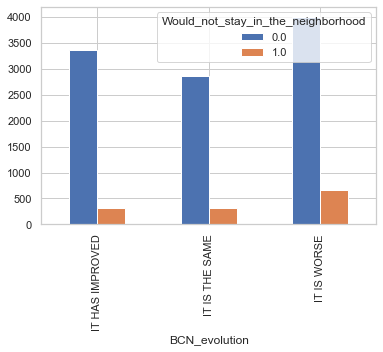

In [144]:
table = pd.crosstab(data.BCN_evolution, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

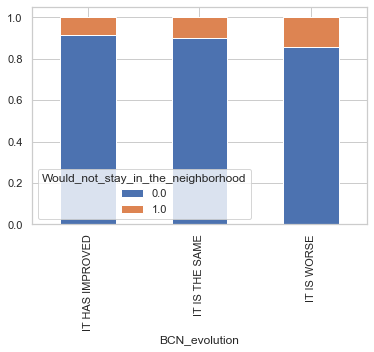

In [145]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [146]:
data_prep2 = {"IT'S WORSE": "IT IS WORSE", 
             "IT'S THE SAME": "IT IS THE SAME", 
             'IT HAS IMPROVED': "IT HAS IMPROVED", 
             "I DON'T KNOW": "IT IS THE SAME",
             'NO ANSWER': np.nan}
data['BCN_evolution2'] = [data_prep2[i] for i in data['EVO1A_BCN']]

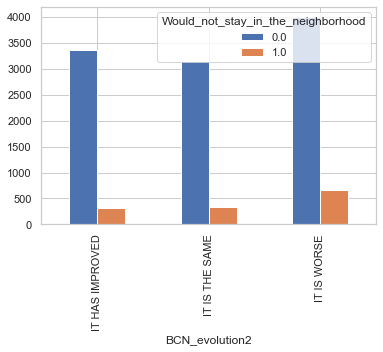

In [147]:
table = pd.crosstab(data.BCN_evolution2, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

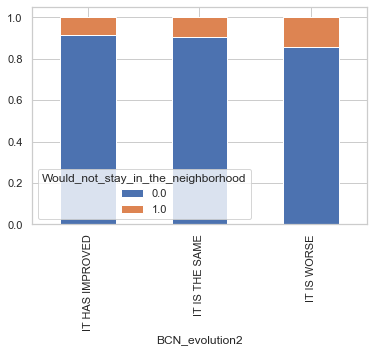

In [148]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

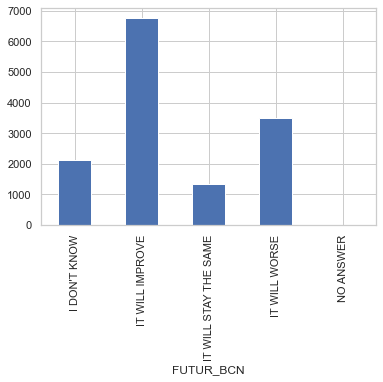

In [149]:
# FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?
survey_65.groupby(['FUTUR_BCN']).size().plot.bar()

In [150]:
display(pd.crosstab(data.FUTUR_BCN, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
FUTUR_BCN,,
I DON'T KNOW,1609,193
IT WILL IMPROVE,5385,587
IT WILL STAY THE SAME,1024,150
IT WILL WORSE,2471,389
NO ANSWER,9,2


In [151]:
data.FUTUR_BCN.unique()

array(['IT WILL WORSE', 'IT WILL IMPROVE', 'IT WILL STAY THE SAME',
       "I DON'T KNOW", 'NO ANSWER'], dtype=object)

In [152]:
data_prep = {'IT WILL WORSE': "IT WILL GET WORSE", 
             'IT WILL IMPROVE': "IT WILL IMPROVE", 
             'IT WILL STAY THE SAME': "IT WILL STAY THE SAME",
             "I DON'T KNOW": np.nan, 
             'NO ANSWER': np.nan}
data['BCN_future'] = [data_prep[i] for i in data['FUTUR_BCN']]

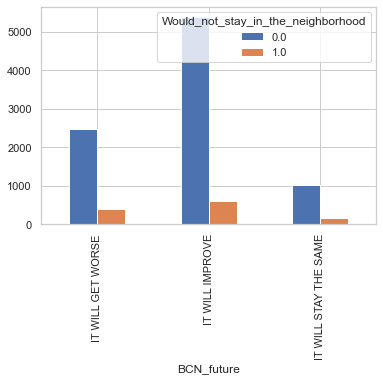

In [153]:
table = pd.crosstab(data.BCN_future, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

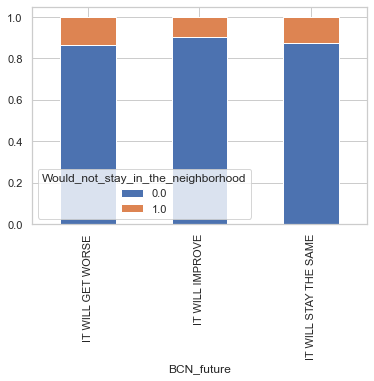

In [154]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [155]:
data_prep2 = {'IT WILL WORSE': "IT WILL GET WORSE", 
             'IT WILL IMPROVE': "IT WILL IMPROVE", 
             'IT WILL STAY THE SAME': "IT WILL STAY THE SAME",
             "I DON'T KNOW": "IT WILL STAY THE SAME", 
             'NO ANSWER': np.nan}
data['BCN_future2'] = [data_prep2[i] for i in data['FUTUR_BCN']]

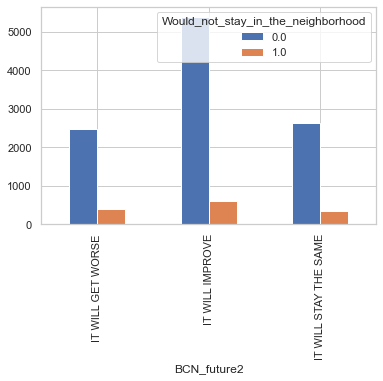

In [156]:
table = pd.crosstab(data.BCN_future2, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

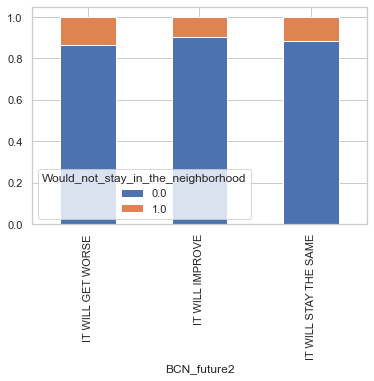

In [157]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

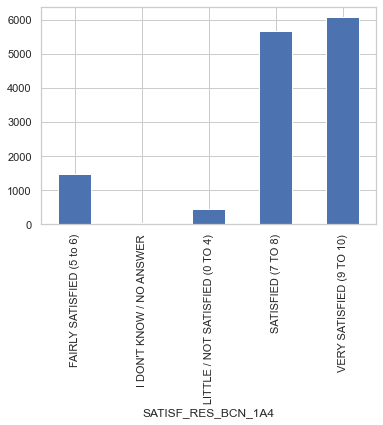

In [158]:
# ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA? - GROUPED
survey_65.groupby(['SATISF_RES_BCN_1A4']).size().plot.bar()

In [159]:
display(pd.crosstab(data.SATISF_RES_BCN_1A4, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
SATISF_RES_BCN_1A4,,
FAIRLY SATISFIED (5 to 6),883,183
I DON'T KNOW / NO ANSWER,42,8
LITTLE / NOT SATISFIED (0 TO 4),190,54
SATISFIED (7 TO 8),4328,582
VERY SATISFIED (9 TO 10),5055,494


In [160]:
data.SATISF_RES_BCN_1A4.unique()

array(['SATISFIED (7 TO 8)', 'VERY SATISFIED (9 TO 10)',
       'FAIRLY SATISFIED (5 to 6)', 'LITTLE / NOT SATISFIED (0 TO 4)',
       "I DON'T KNOW / NO ANSWER"], dtype=object)

In [161]:
data_prep = {'SATISFIED (7 TO 8)': 'SATISFIED', 
             'VERY SATISFIED (9 TO 10)': 'SATISFIED',
             'FAIRLY SATISFIED (5 to 6)': 'NOT SATISFIED', 
             'LITTLE / NOT SATISFIED (0 TO 4)': 'NOT SATISFIED',
             "I DON'T KNOW / NO ANSWER": np.nan}
data['BCN_satisfaction_of_living'] = [data_prep[i] for i in data['SATISF_RES_BCN_1A4']]

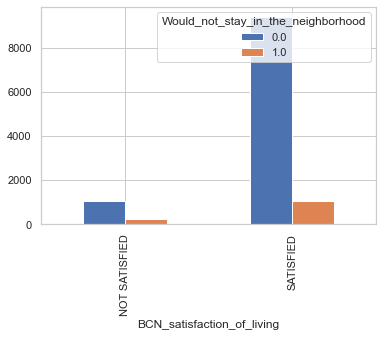

In [162]:
table = pd.crosstab(data.BCN_satisfaction_of_living, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

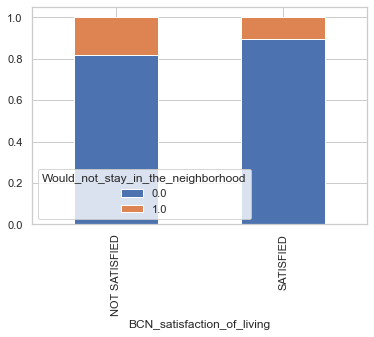

In [163]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

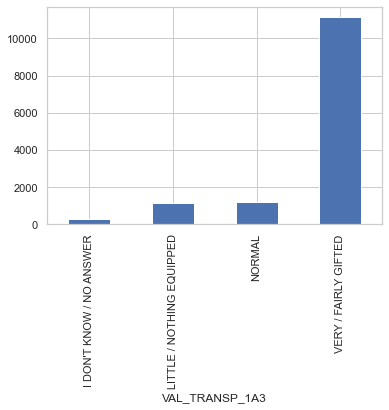

In [164]:
# IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT BARCELONA IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY? - GROUPED
survey_65.groupby(['VAL_TRANSP_1A3']).size().plot.bar()

In [165]:
display(pd.crosstab(data.VAL_TRANSP_1A3, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_TRANSP_1A3,,
I DON'T KNOW / NO ANSWER,208,28
LITTLE / NOTHING EQUIPPED,779,139
NORMAL,866,119
VERY / FAIRLY GIFTED,8645,1035


In [166]:
data.VAL_TRANSP_1A3.unique()

array(['VERY / FAIRLY GIFTED', 'NORMAL', 'LITTLE / NOTHING EQUIPPED',
       "I DON'T KNOW / NO ANSWER"], dtype=object)

In [167]:
data_prep = {'VERY / FAIRLY GIFTED': "GOOD", 
             'NORMAL': "NORMAL", 
             'LITTLE / NOTHING EQUIPPED': "BAD",
             "I DON'T KNOW / NO ANSWER": np.nan}
data['BCN_transport'] = [data_prep[i] for i in data['VAL_TRANSP_1A3']]

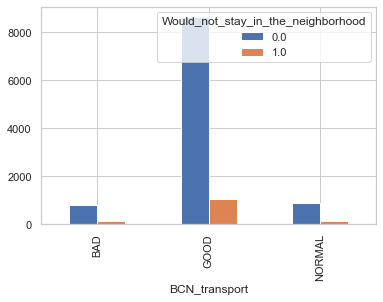

In [168]:
table = pd.crosstab(data.BCN_transport, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

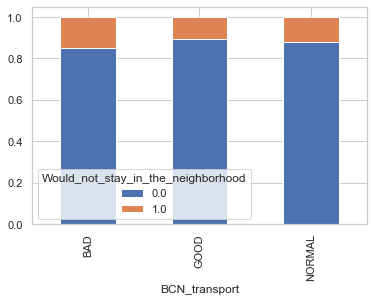

In [169]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

Creating comparable variables - if respondends rate the city higher than the neighbourhood: 
'BCN_if_has_improved' & 'Barri_if_has_improved', 'BCN_if_will_improve' & 'Barri_if_will_improve', 'BCN_satisfaction_of_living' & 'Barri_satisfaction_of_living', 'BCN_city_management' & 'Barri_city_management', 'BCN_transport' & 'Barri_transport'.

In [170]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_evolution'] == 'IT HAS IMPROVED' and data.iloc[j]['Barri_evolution'] == "IT IS WORSE":
        new_column.append(1)
    elif data.iloc[j]['BCN_evolution'] == 'IT HAS IMPROVED' and data.iloc[j]['Barri_evolution'] == "IT IS THE SAME":
        new_column.append(1)
    elif data.iloc[j]['BCN_evolution'] == 'IT IS THE SAME' and data.iloc[j]['Barri_evolution'] == "IT IS WORSE":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_evolution'] = new_column

In [171]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_future'] == 'IT WILL IMPROVE' and data.iloc[j]['Barri_future'] == "IT WILL GET WORSE":
        new_column.append(1)
    elif data.iloc[j]['BCN_future'] == 'IT WILL IMPROVE' and data.iloc[j]['Barri_future'] == "IT WILL STAY THE SAME":
        new_column.append(1)
    elif data.iloc[j]['BCN_future'] == 'IT WILL STAY THE SAME' and data.iloc[j]['Barri_future'] == "IT WILL GET WORSE":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_future'] = new_column

In [172]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_satisfaction_of_living'] == 'SATISFIED' and data.iloc[j]['Barri_satisfaction_of_living'] == "NOT SATISFIED":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_satisfaction_of_living'] = new_column

In [173]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_transport'] == 'GOOD' and data.iloc[j]['Barri_transport'] == "BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_transport'] == 'GOOD' and data.iloc[j]['Barri_transport'] == "NORMAL":
        new_column.append(1)
    elif data.iloc[j]['BCN_transport'] == 'NORMAL' and data.iloc[j]['Barri_transport'] == "BAD":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_transport'] = new_column

In [174]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_evolution2'] == 'IT HAS IMPROVED' and data.iloc[j]['Barri_evolution2'] == "IT IS WORSE":
        new_column.append(1)
    elif data.iloc[j]['BCN_evolution2'] == 'IT HAS IMPROVED' and data.iloc[j]['Barri_evolution2'] == "IT IS THE SAME":
        new_column.append(1)
    elif data.iloc[j]['BCN_evolution2'] == 'IT IS THE SAME' and data.iloc[j]['Barri_evolution2'] == "IT IS WORSE":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_evolution2'] = new_column

In [175]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_future2'] == 'IT WILL IMPROVE' and data.iloc[j]['Barri_future2'] == "IT WILL GET WORSE":
        new_column.append(1)
    elif data.iloc[j]['BCN_future2'] == 'IT WILL IMPROVE' and data.iloc[j]['Barri_future2'] == "IT WILL STAY THE SAME":
        new_column.append(1)
    elif data.iloc[j]['BCN_future2'] == 'IT WILL STAY THE SAME' and data.iloc[j]['Barri_future2'] == "IT WILL GET WORSE":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_future2'] = new_column

# 1.5 Final dataset

In [176]:
data.head()

,ANY,NOM_DISTRICTE,NOM_BARRI,GRANBARRI,SEXE,EDAT1899_1A6,NACIO_ACT_UE,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,EVO1A_BCN,...,BCN_future,BCN_future2,BCN_satisfaction_of_living,BCN_transport,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport,BCN_over_barri_evolution2,BCN_over_barri_future2
81817,2011,EIXAMPLE,LA SAGRADA FAMÍLIA,LA SAGRADA FAMÍLIA,WOMAN,65 YEARS AND OVER,SPANISH,MORE THAN 10 YEARS,MORE THAN 10 YEARS,IT'S WORSE,...,IT WILL GET WORSE,IT WILL GET WORSE,SATISFIED,GOOD,0,0,1,0,0,0
81819,2011,EIXAMPLE,LA SAGRADA FAMÍLIA,LA SAGRADA FAMÍLIA,WOMAN,65 YEARS AND OVER,SPANISH,I HAVE ALWAYS LIVED IN THE CITY,MORE THAN 10 YEARS,IT'S WORSE,...,IT WILL GET WORSE,IT WILL GET WORSE,SATISFIED,NORMAL,0,0,0,0,0,0
81821,2011,EIXAMPLE,LA SAGRADA FAMÍLIA,LA SAGRADA FAMÍLIA,WOMAN,65 YEARS AND OVER,SPANISH,I HAVE ALWAYS LIVED IN THE CITY,MORE THAN 10 YEARS,IT'S THE SAME,...,IT WILL IMPROVE,IT WILL IMPROVE,SATISFIED,GOOD,1,1,0,0,1,1
81823,2011,EIXAMPLE,LA SAGRADA FAMÍLIA,LA SAGRADA FAMÍLIA,WOMAN,65 YEARS AND OVER,SPANISH,MORE THAN 10 YEARS,MORE THAN 5 YEARS AND UP TO 10 YEARS,IT'S WORSE,...,IT WILL STAY THE SAME,IT WILL STAY THE SAME,SATISFIED,GOOD,0,1,0,0,0,1
81824,2011,EIXAMPLE,LA SAGRADA FAMÍLIA,LA SAGRADA FAMÍLIA,MAN,65 YEARS AND OVER,SPANISH,I HAVE ALWAYS LIVED IN THE CITY,MORE THAN 10 YEARS,IT'S THE SAME,...,IT WILL STAY THE SAME,IT WILL STAY THE SAME,SATISFIED,NORMAL,0,0,1,0,0,0


In [177]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'NOM_BARRI',
 'GRANBARRI',
 'SEXE',
 'EDAT1899_1A6',
 'NACIO_ACT_UE',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'EVO1A_BCN',
 'FUTUR_BCN',
 'SATISF_RES_BCN_1A4',
 'VAL_GESTMUNI_1A2',
 'VAL_ESCOMBRARIES_1A2',
 'VAL_NETEJA_1A2',
 'VAL_VERD_1A2',
 'VAL_ENLLUM_1A2',
 'VAL_URBA_1A2',
 'VAL_ASFALT_1A2',
 'VAL_FACANES_1A2',
 'VAL_CIRCUL_1A2',
 'VAL_APARCA_1A2',
 'VAL_BUS_1A2',
 'VAL_METRO_1A2',
 'VAL_GUB_1A2',
 'VAL_SEGUR_1A2',
 'VAL_SEGUR_BARRI_1A2',
 'VAL_ESPORT_1A2',
 'VAL_SIAC_1A2',
 'VAL_CSS_1A2',
 'VAL_CULT_1A2',
 'VAL_FESTESPOP_1A2',
 'VAL_MERCAT_1A2',
 'VAL_BIBLIO_1A2',
 'TRANSP_MOU',
 'VAL_TRANSP_1A3',
 'VAL_TRANSP_BARRI_1A3',
 'EVO1A_BARRI',
 'FUTUR_BARRI',
 'SATISF_RES_BARRI_1A4',
 'COMPARA_BARRI',
 'CANVI_LLOC_RES_1A3',
 'VAL_GESTBARRI_1A2',
 'HAB_COTXE_PART',
 'HAB_M2_1A14',
 'LLAR_INGRESSOS_1A10',
 'CLASSESOC_ENT',
 'SENTPERTI',
 'LLOC_NAIX_1A4',
 'LLENGUA_HAB',
 'ESTUDIS_1A6',
 'RESUM_PARENTIU',
 'HAB_RES_1A4',
 'Would_not_stay_in_the_neighborhood',


In [178]:
survey_transformed = data[['ANY', 'NOM_DISTRICTE', 
                           'Would_not_stay_in_the_neighborhood', 'Gender', 'Time_living_in_barri', 
                           'Barri_evolution', 'Barri_future', 'Barri_satisfaction_of_living', 'Barri_comparison',
                           'GARBAGE COLLECTION', 'STREETS CLEANING', 'GREEN AREAS', 'PUBLIC LIGHTING',
                           'ASPHALT AND STREET CONSERVATION', 'FACADES AND BUILDING CONSERVATION', 'CIRCULATION', 
                           'BUS', 'MUNICIPAL POLICE', 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
                           'CITIZEN SECURITY IN THE NEIGHBORHOOD', 'MUNICIPAL MARKETS',
                           'Barri_transport', 'Owns_a_car', 'House_size', 'Monthly_family_income', 'Social_class',
                           'Living_alone', 'BCN_evolution', 'BCN_future', 'BCN_satisfaction_of_living', 'BCN_transport',
                           'BCN_over_barri_evolution', 'BCN_over_barri_future', 'BCN_over_barri_satisfaction_of_living',
                           'BCN_over_barri_transport']]

In [179]:
survey_transformed.reset_index(drop=True, inplace=True)

In [180]:
survey_transformed.head()

,ANY,NOM_DISTRICTE,Would_not_stay_in_the_neighborhood,Gender,Time_living_in_barri,Barri_evolution,Barri_future,Barri_satisfaction_of_living,Barri_comparison,GARBAGE COLLECTION,...,Social_class,Living_alone,BCN_evolution,BCN_future,BCN_satisfaction_of_living,BCN_transport,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport
0,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,NOT SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-HIGH,1,IT IS WORSE,IT WILL GET WORSE,SATISFIED,GOOD,0,0,1,0
1,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS THE SAME,IT WILL STAY THE SAME,SATISFIED,"NEITHER THE BEST, NOR THE WORST",BAD,...,MIDDLE-MIDDLE,0,IT IS WORSE,IT WILL GET WORSE,SATISFIED,NORMAL,0,0,0,0
2,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL STAY THE SAME,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-MIDDLE,1,IT IS THE SAME,IT WILL IMPROVE,SATISFIED,GOOD,1,1,0,0
3,2011,EIXAMPLE,0.0,1,LESS THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,SATISFIED,ONE OF THE BEST,GOOD,...,MIDDLE-MIDDLE,1,IT IS WORSE,IT WILL STAY THE SAME,SATISFIED,GOOD,0,1,0,0
4,2011,EIXAMPLE,1.0,0,MORE THAN 10 YEARS,IT IS THE SAME,IT WILL STAY THE SAME,NOT SATISFIED,"NEITHER THE BEST, NOR THE WORST",BAD,...,MIDDLE-LOW,0,IT IS THE SAME,IT WILL STAY THE SAME,SATISFIED,NORMAL,0,0,1,0


In [181]:
survey_transformed.shape

(13742, 35)

In [182]:
survey_transformed.dropna(inplace=True)

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [183]:
survey_transformed.shape

(4531, 35)

In [184]:
survey_transformed.to_pickle("survey_transformed.pkl")

In [185]:
survey_transformed2 = data[['ANY', 'NOM_DISTRICTE', 
                           'Would_not_stay_in_the_neighborhood', 'Gender', 'Time_living_in_barri', 
                           'Barri_evolution2', 'Barri_future2', 'Barri_satisfaction_of_living', 'Barri_comparison2',
                           'GARBAGE COLLECTION', 'STREETS CLEANING', 'GREEN AREAS', 'PUBLIC LIGHTING',
                           'ASPHALT AND STREET CONSERVATION', 'FACADES AND BUILDING CONSERVATION', 'CIRCULATION', 
                           'BUS', 'MUNICIPAL POLICE', 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
                           'CITIZEN SECURITY IN THE NEIGHBORHOOD', 'MUNICIPAL MARKETS',
                           'Barri_transport', 'Owns_a_car', 'House_size2', 'Monthly_family_income2', 'Social_class2',
                           'Living_alone', 'BCN_evolution2', 'BCN_future2', 'BCN_satisfaction_of_living', 'BCN_transport',
                           'BCN_over_barri_evolution2', 'BCN_over_barri_future2', 'BCN_over_barri_satisfaction_of_living',
                           'BCN_over_barri_transport']]

In [186]:
survey_transformed2.reset_index(drop=True, inplace=True)

In [187]:
survey_transformed2.shape

(13742, 35)

In [188]:
survey_transformed2.dropna(inplace=True)

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [189]:
survey_transformed2.shape

(6245, 35)

In [190]:
survey_transformed2.to_pickle("survey_transformed2.pkl")